In [132]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [133]:
import sklearn
from sklearn.linear_model import LinearRegression
#rom sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LassoLars

from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [134]:
def get_ranks(good_df,ypred):
    cutoff=0.2
    #print (codedata,ypred,ydata)
    #print (len(ypred),len(good_df.mm.to_list()))
    d = {'code':good_df.code.to_list(),'pred':ypred,
         "dockQ":good_df.dockQ.to_list(),"params":good_df.params.to_list(),
        "mm":good_df.mm.to_list()}
    res_df=pd.DataFrame(d).sort_values("pred")
    #res_df.sort_values("CODE")

    i=0
    sumdiff=0
    mmdiff=0
    correct=0
    for code in res_df.code.unique():
        topranked=res_df.loc[res_df.code==code].sort_values("pred")["dockQ"][-1:].max()
        best=res_df.loc[res_df.code==code]["dockQ"].max()
        mmtop=res_df.loc[res_df.code==code].sort_values("pred")["mm"][-1:].max()
        mmbest=res_df.loc[res_df.code==code]["mm"].max()
        #print (code,topranked,best)
        if best>cutoff:
            i+=1
            sumdiff+=best-topranked
            mmdiff+=mmbest-mmtop
            if topranked>cutoff:
                correct+=1
    #print (i,correct,round(sumdiff/i,3))            
    return (i,correct,sumdiff,mmdiff)

In [135]:
reg = LinearRegression()
#reg=RandomForestClassifier(n_estimators=10)
#reg=LassoLars(alpha=.1)
#reg = TweedieRegressor(power=1, alpha=0.5, link='log')
#reg=TheilSenRegressor(random_state=42)
#reg=RANSACRegressor(random_state=42)
#reg=HuberRegressor()

In [136]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")
df=df.dropna()

In [137]:
sns.set(style="whitegrid")

In [138]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

In [139]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]

In [140]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
notRosettaset=list(filter(r.match, datasets))
df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
df2.JHparams="trRosetta"
df2.params="trRosetta"
df2

name   JHparams  lenA  lenB     msa      msaA      msaB  \
0      1ay7_u1_A-1ay7_u2_A  trRosetta    97    90  1060.0    1485.0    2034.0   
1      1ay7_u2_A-1ay7_u1_A  trRosetta    90    97  1060.0    2034.0    1485.0   
2      1b27_u1_A-1b27_u2_A  trRosetta   109    90   733.0    1484.0    2034.0   
3      1b27_u2_A-1b27_u1_A  trRosetta    90   109   733.0    2034.0    1484.0   
4      1bdj_u1_A-1bdj_u2_A  trRosetta   129   118  5651.0  349880.0   23051.0   
...                    ...        ...   ...   ...     ...       ...       ...   
11045  4y5o_u1_A-4y5o_u2_A  trRosetta    94    85    34.0    3100.0    1781.0   
11046  4zfr_u1_A-4zfr_u2_A  trRosetta   186    77    12.0    9290.0   38386.0   
11047  5brr_u1_A-5brr_u2_A  trRosetta   378   266   107.0   13553.0   45450.0   
11048  5cec_u1_A-5cec_u2_A  trRosetta   403   191     7.0   30621.0  309307.0   
11049  5eg3_u1_A-5eg3_u2_A  trRosetta   303   105     7.0  565997.0   25926.0   

        cdhit  dockQ   fnat  ...  medpdb  longpdb  avprob   auc  evalue  \
0      1026.0  0.298  0.222  ...   178.0    828.0   0.108  0.40  9999.0   
1       989.0  0.239  0.250  ...   188.0    771.0   0.112  0.36  9999.0   
2       654.0  0.223  0.120  ...   187.0    838.0   0.096  0.46     4.3   
3       656.0  0.229  0.160  ...   219.0    922.0   0.099  0.46     4.3   
4      5071.0  0.000  0.000  ...   157.0   1028.0   0.020  0.00  9999.0   
...       ...    ...    ...  ...     ...      ...     ...   ...     ...   
11045    11.0  0.055  0.000  ...    75.0    570.0   0.136  0.00  9999.0   
11046    12.0  0.048  0.000  ...   158.0    615.0   0.160  0.09  9999.0   
11047    79.0  0.009  0.000  ...   332.0   2118.0   0.195  0.00   236.0   
11048     7.0  0.011  0.000  ...   412.0   2031.0   0.220  0.00   197.0   
11049     5.0  0.003  0.000  ...   221.0    893.0   0.149  0.00    68.0   

        seqid  rank  code  CODE     params  
0       0.000   1.0  1ay7  1ay7  trRosetta  
1       0.000   2.0  1ay7  1ay7  trRosetta  
2      50.000   1.0  1b27  1b27  trRosetta  
3      50.000   2.0  1b27  1b27  trRosetta  
4       0.000   1.0  1bdj  1bdj  trRosetta  
...       ...   ...   ...   ...        ...  
11045   0.000   1.0  4y5o  4y5o  trRosetta  
11046   0.000   1.0  4zfr  4zfr  trRosetta  
11047  66.667   1.0  5brr  5brr  trRosetta  
11048  33.333   1.0  5cec  5cec  trRosetta  
11049  40.000   1.0  5eg3  5eg3  trRosetta  

[4570 rows x 45 columns]

In [141]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [142]:
r=re.compile("^PDB|^pdb")
datasets=df.JHparams.unique()
pdbset=list(filter(r.match, datasets))
df2=df.loc[(df.JHparams.isin(pdbset))&(~df.JHparams.isin(["pdbconfold"]))].copy()
df2.JHparams="PDB"
df2.params="PDB"
df2

name JHparams  lenA  lenB     msa      msaA  \
7325               1ay7_u1_A-1ay7_u2_A      PDB    97    90  1060.0    1485.0   
7326               1b27_u1_A-1b27_u2_A      PDB   109    90   733.0    1484.0   
7327               1bdj_u1_A-1bdj_u2_A      PDB   129   118  5651.0  349880.0   
7328               1bdj_u2_A-1bdj_u1_A      PDB   118   129  5651.0   23051.0   
7329               1bvn_u1_A-1bvn_u2_A      PDB   496    75    95.0   52623.0   
...                                ...      ...   ...   ...     ...       ...   
9599  4k0v_u1_A-4k0v_u2_A.pdb-starting      PDB   424   218     0.0       0.0   
9600  4rf0_u1_A-4rf0_u2_A.pdb-starting      PDB   320    77     0.0       0.0   
9601     4rf0_u1_A-4rf0_u2_A.pdb-step1      PDB   320    77     0.0       0.0   
9602  4xhu_u1_A-4xhu_u2_A.pdb-starting      PDB   352    95     0.0       0.0   
9603     4xhu_u1_A-4xhu_u2_A.pdb-step1      PDB   352    95     0.0       0.0   

          msaB   cdhit  dockQ   fnat  ...  medpdb  longpdb  avprob   auc  \
7325    2034.0   986.0  0.888  0.861  ...     0.0      0.0     0.0  0.02   
7326    2034.0   654.0  0.813  0.700  ...     0.0      0.0     0.0  0.02   
7327   23051.0  5071.0  0.729  0.765  ...     0.0      0.0     0.0  0.01   
7328  349880.0  5080.0  0.060  0.118  ...     0.0      0.0     0.0  0.07   
7329     123.0    85.0  0.076  0.154  ...     0.0      0.0     0.0  0.05   
...        ...     ...    ...    ...  ...     ...      ...     ...   ...   
9599       0.0     0.0  0.000  0.000  ...     0.0      0.0     0.0  0.08   
9600       0.0     0.0  0.000  0.000  ...     0.0      0.0     0.0  0.05   
9601       0.0     0.0  0.220  0.556  ...     0.0      0.0     0.0  0.05   
9602       0.0     0.0  0.000  0.000  ...     0.0      0.0     0.0  0.02   
9603       0.0     0.0  0.169  0.444  ...     0.0      0.0     0.0  0.02   

      evalue   seqid  rank  code  CODE  params  
7325  9999.0   0.000   1.0  1ay7  1ay7     PDB  
7326     4.3  50.000   1.0  1b27  1b27     PDB  
7327  9999.0   0.000   1.0  1bdj  1bdj     PDB  
7328  9999.0   0.000   2.0  1bdj  1bdj     PDB  
7329     2.3  31.250   1.0  1bvn  1bvn     PDB  
...      ...     ...   ...   ...   ...     ...  
9599   144.0  42.857   1.0  4k0v  4k0v     PDB  
9600    51.0  60.000   1.0  4rf0  4rf0     PDB  
9601    51.0  60.000   1.0  4rf0  4rf0     PDB  
9602    17.0  22.222   1.0  4xhu  4xhu     PDB  
9603    17.0  22.222   1.0  4xhu  4xhu     PDB  

[2279 rows x 45 columns]

In [143]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.params.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [144]:
# Add a linear combination of trRosetta
r=re.compile(".*-N.*") # .*cpu.*
datasets=df.JHparams.unique()
JHsets=list(filter(r.match, datasets))



In [145]:
cutoff=0.1
goodmodels=df.loc[(df.dockQ>cutoff)&(df.JHparams.isin(JHsets))].code.unique()
good_df=df.loc[(df.code.isin(goodmodels))&(df.JHparams.isin(JHsets))] #.reset_index()
df.dockQ.dtypes

dtype('float64')

Text(0.5, 1.0, 'CC 0.294 Good: 0.889 Loss: 0.057 , 0.076 Test: 9')

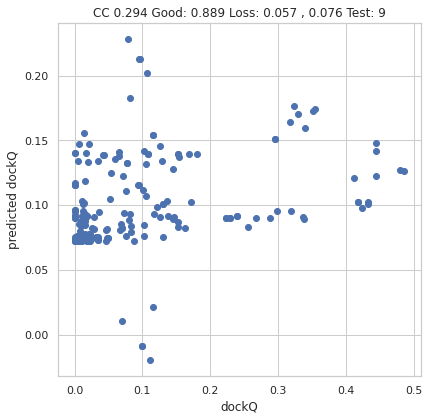

In [146]:
ydata=good_df.dockQ

#cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]
#xdata=good_df[["lenA","lenB","long","med"]]
#cols=["longA","longB","medA","medB","tmA","tmB"]
cols=["med","long","msa"]
#cols=["msa"]
xdata=good_df[cols]
reg.fit(xdata,ydata)
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
(i,j,dockq,mm)=get_ranks(good_df,ypred)
#print(i,j,k/i)
ax.set_title("CC" + " " + str(round(cc[0,1],3))
            + " Good: " + str(round(j/i,3)) + " Loss: " + str(round(dockq/i,3))
             + " , " + str(round(mm/i,3))
             + " Test: " + str(i)
            )


In [147]:
xdata=df.loc[df.JHparams.isin(JHsets)][cols]
ypred = reg.predict(xdata)
df2=df.loc[df.JHparams.isin(JHsets)].reset_index()
df2.loc[:,'pred'] = ypred
topranked=pd.DataFrame(columns = df2.columns) 


In [148]:

for name in df2.name.unique():
    foo=df2.loc[df2.name==name].sort_values("pred")[-1:].max()
    #print(foo)
    foo_df=pd.DataFrame(foo).transpose()
    #print (foo_df)
    topranked=pd.concat([topranked,foo_df], ignore_index=True)
topranked["JHparams"]="JHranked"
topranked.params="JHranked"
topranked=topranked.drop(["pred","index"],axis=1)
topranked.columns

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank', 'code', 'CODE', 'params'],
      dtype='object')

In [149]:
df.columns

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank', 'code', 'CODE', 'params'],
      dtype='object')

In [150]:
df=pd.concat([df,topranked], ignore_index=True,sort=False)
df.fillna(0)
df.params.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [151]:
df

name      JHparams lenA lenB   msa    msaA    msaB  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060    1485    2034   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8   90   97  1060    2034    1485   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733    1484    2034   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8   90  109   733    2034    1484   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8  129  118  5651  349880   23051   
...                    ...           ...  ...  ...   ...     ...     ...   
26174  5cec_u2_A-5cec_u1_A      JHranked  191  403     8   59695     200   
26175  5cra_u1_A-5cra_u2_A      JHranked  193   77     1      11   42026   
26176  5cra_u2_A-5cra_u1_A      JHranked   77  193     1   42026      11   
26177  5eg3_u1_A-5eg3_u2_A      JHranked  303  105   499  560629   26558   
26178  5eg3_u2_A-5eg3_u1_A      JHranked  105  303   305    3955  147816   

      cdhit  dockQ   fnat  ... medpdb longpdb avprob   auc evalue   seqid  \
0      1026  0.298  0.222  ...    178     828  0.108   0.4   9999       0   
1       989  0.239   0.25  ...    188     771  0.112  0.36   9999       0   
2       654  0.223   0.12  ...    187     838  0.096  0.46    4.3      50   
3       656  0.229   0.16  ...    219     922  0.099  0.46    4.3      50   
4      5071      0      0  ...    157    1028   0.02     0   9999       0   
...     ...    ...    ...  ...    ...     ...    ...   ...    ...     ...   
26174     7   0.05  0.075  ...   1039    4734  0.226     0    197  33.333   
26175     1  0.008      0  ...    148     595  0.179     0   9999       0   
26176     1  0.103      0  ...    417    2052  0.181  0.17   9999       0   
26177   278      0      0  ...    221     893  0.046     0     68      40   
26178   102  0.012      0  ...    645    3089  0.098     0     68      40   

      rank  code  CODE        params  
0        1  1ay7  1ay7  -N 3 --cpu 8  
1        2  1ay7  1ay7  -N 3 --cpu 8  
2        1  1b27  1b27  -N 3 --cpu 8  
3        2  1b27  1b27  -N 3 --cpu 8  
4        1  1bdj  1bdj  -N 3 --cpu 8  
...    ...   ...   ...           ...  
26174    2  5cec  5cec      JHranked  
26175    1  5cra  5cra      JHranked  
26176    2  5cra  5cra      JHranked  
26177    1  5eg3  5eg3      JHranked  
26178    2  5eg3  5eg3      JHranked  

[26179 rows x 45 columns]

In [152]:
#df["rank"].str.isnumeric().unique()
#df.dtypes

In [153]:
# We need to check that everything is numeric
cols=['name', 'JHparams', 'seqid',      'rank']

#for d in df.columns.values.tolist():
for d in ["rank","len"]:
    if d=="name": continue
    if d=="JHparams": continue
    print (d)
    #print (df.loc[(df[d].str.isnumeric()!=True)][cols+[d]])
    #print (df.loc[(df[d].str.isnumeric()][d].unique()
    #print (df[d].str.isnumeric().unique())

rank
len


In [154]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

In [155]:
df.columns.values.tolist()

['name',
 'JHparams',
 'lenA',
 'lenB',
 'msa',
 'msaA',
 'msaB',
 'cdhit',
 'dockQ',
 'fnat',
 'iRMS',
 'LRMS',
 'fnonnat',
 'mm',
 'tmA',
 'tmB',
 'long',
 'med',
 'longPPV',
 'medPPV',
 'longA',
 'medA',
 'longPPVA',
 'medPPVA',
 'longB',
 'medB',
 'longPPVB',
 'medPPVB',
 'short',
 'shortPPV',
 'shortA',
 'shortPPVA',
 'shortB',
 'shortPPVB',
 'shortpdb',
 'medpdb',
 'longpdb',
 'avprob',
 'auc',
 'evalue',
 'seqid',
 'rank',
 'code',
 'CODE',
 'params',
 'tmAB',
 'msaAB',
 'tmAB_max',
 'msaAB_max',
 'tmAB_min',
 'msaAB_min',
 'numcorrect',
 'len']

In [156]:
cols=['name', 'JHparams', 'seqid',      'rank']
      
d="TMdock-nohomology"
#df.loc[df.JHparams==d].groupby(["code"])[cols].first()

df.loc[(df.JHparams==d) & ((df["rank"].str.isnumeric()!=True))][cols]
#df.loc[(df.JHparams==d)]["rank"].str.isnumeric()
#df.loc[(df.JHparams==d)] 
      
      

AttributeError: Can only use .str accessor with string values!

In [157]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    print (d)
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


-N 3 --cpu 8


confold


gramm


homodimer


ispred


-N 1 -E 1.e-100 --cpu 8


-N 1 -E 1.e-2 


N1-merged-pdb


N1-merged


-N 1 -E 1.e-10 --cpu 8 


N1-top1000-merged


N1-top1000


N1-top100


N1-top2000


N1-top500


N3dock


-N 3 --incE 1.e-2


N3-merged


N3-multimerged


N3-newdockA


N3-newdockB


N3-newdockC


N5-newdockA


N5-newdockB


N5-newdockC


-N 5 --cpu 8


pdbconfold


pdbcontacts


PDBDOCK2


PDBDOCK3


PDBDOCK4


PDBDOCK


PDBNEWDOCK-standard


PDBNEWDOCK-standard--starting


PDBNEWDOCK-standard--step1


pdbnewcontacts


PDBNEWDOCK-A--dockB1


PDBNEWDOCK-A--dockB2


PDBNEWDOCK-A--dockB-relax


PDBNEWDOCK-A--dockC1


PDBNEWDOCK-A--dockC2


PDBNEWDOCK-A--dockC-relax


PDBNEWDOCK-A--dockD1


PDBNEWDOCK-A--dockD2


PDBNEWDOCK-A--dockD-relax


PDBNEWDOCK-A--starting


PDBNEWDOCK-A--step1


PDBNEWDOCK-B--dockB1


PDBNEWDOCK-B--dockB2


PDBNEWDOCK-B--dockB-relax


PDBNEWDOCK-B--dockC1


PDBNEWDOCK-B--dockC2


PDBNEWDOCK-B--dockC-relax


PDBNEWDOCK-B--dockD1


PDBNEWDOCK-B--dockD2


PDBNEWDOCK-B--dockD-relax


PDBNEWDOCK-B--starting


PDBNEWDOCK-B--step1


PDBNEWDOCK-C--dockB1


PDBNEWDOCK-C--dockB2


PDBNEWDOCK-C--dockB-relax


PDBNEWDOCK-C--dockC1


PDBNEWDOCK-C--dockC2


PDBNEWDOCK-C--dockC-relax


PDBNEWDOCK-C--dockD1


PDBNEWDOCK-C--dockD2


PDBNEWDOCK-C--dockD-relax


PDBNEWDOCK-C--starting


PDBNEWDOCK-C--step1


PDBNEWDOCK-D--dockB1


PDBNEWDOCK-D--dockB2


PDBNEWDOCK-D--dockB-relax


PDBNEWDOCK-D--dockC1


PDBNEWDOCK-D--dockC2


PDBNEWDOCK-D--dockC-relax


PDBNEWDOCK-D--dockD1


PDBNEWDOCK-D--dockD2


PDBNEWDOCK-D--dockD-relax


PDBNEWDOCK-D--starting


PDBNEWDOCK-D--step1


PDBNEWDOCK-repulsion--starting


PDBNEWDOCK-repulsion--step1


rbh-jh


rbh-merged-pdb


rbh-merged
rbh


TMdock-nohomology-1.e-5


TMdock-double


TMdock-nohomology


TMdock


trRosetta


PDB


JHranked


In [158]:
df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

name   JHparams lenA lenB   msa    msaA    msaB cdhit  \
18894  1ay7_u1_A-1ay7_u2_A  trRosetta   97   90  1060    1485    2034  1026   
18896  1b27_u1_A-1b27_u2_A  trRosetta  109   90   733    1484    2034   654   
18898  1bdj_u1_A-1bdj_u2_A  trRosetta  129  118  5651  349880   23051  5071   
18900  1buh_u1_A-1buh_u2_A  trRosetta  291   72  1177  555226    1820   548   
18902  1bvn_u1_A-1bvn_u2_A  trRosetta  496   75    95   52623     123    85   
...                    ...        ...  ...  ...   ...     ...     ...   ...   
23459  4y5o_u1_A-4y5o_u2_A  trRosetta   94   85    34    3100    1781    11   
23460  4zfr_u1_A-4zfr_u2_A  trRosetta  186   77    12    9290   38386    12   
23461  5brr_u1_A-5brr_u2_A  trRosetta  378  266   107   13553   45450    79   
23462  5cec_u1_A-5cec_u2_A  trRosetta  403  191     7   30621  309307     7   
23463  5eg3_u1_A-5eg3_u2_A  trRosetta  303  105     7  565997   25926     5   

       dockQ   fnat  ...  CODE     params      tmAB     msaAB tmAB_max  \
18894  0.298  0.222  ...  1ay7  trRosetta  0.828190    1759.5  0.84625   
18896  0.223   0.12  ...  1b27  trRosetta  0.824750    1759.0  0.85428   
18898      0      0  ...  1bdj  trRosetta  0.861435  186465.5  0.92240   
18900      0      0  ...  1buh  trRosetta  0.560760  278523.0  0.73259   
18902  0.006      0  ...  1bvn  trRosetta  0.619740   26373.0  0.70905   
...      ...    ...  ...   ...        ...       ...       ...      ...   
23459  0.055      0  ...  4y5o  trRosetta  0.568465    2440.5  0.71099   
23460  0.048      0  ...  4zfr  trRosetta  0.505235   23838.0  0.64391   
23461  0.009      0  ...  5brr  trRosetta  0.332210   29501.5  0.38444   
23462  0.011      0  ...  5cec  trRosetta  0.508770  169964.0  0.70983   
23463  0.003      0  ...  5eg3  trRosetta  0.358330  295961.5  0.41599   

      msaAB_max tmAB_min msaAB_min numcorrect  len  
18894    2034.0  0.81013    1485.0     53.985  187  
18896    2034.0  0.79522    1484.0     49.025  199  
18898  349880.0  0.80047   23051.0          0  247  
18900  555226.0  0.38893    1820.0          0  363  
18902   52623.0  0.53043     123.0          0  571  
...         ...      ...       ...        ...  ...  
23459    3100.0  0.42594    1781.0          0  179  
23460   38386.0  0.36656    9290.0          3  263  
23461   45450.0  0.27998   13553.0        468  644  
23462  309307.0  0.30771   30621.0      2.006  594  
23463  565997.0  0.30067   25926.0          0  408  

[2538 rows x 53 columns]

In [159]:
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [160]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first[datasets[1]]

name JHparams lenA lenB msa msaA msaB cdhit  dockQ   fnat  \
436  1ay7_u1_A-1ay7_u2_A  confold   97   90   0    0    0     0  0.337    0.5   
441  1b27_u1_A-1b27_u2_A  confold  109   90   0    0    0     0  0.056   0.04   
446  1bvn_u1_A-1bvn_u2_A  confold  496   75   0    0    0     0   0.01      0   
451  1dfj_u1_A-1dfj_u2_A  confold  457  125   0    0    0     0  0.016  0.011   
456  1gcq_u1_A-1gcq_u2_A  confold   66   57   0    0    0     0  0.022      0   
..                   ...      ...  ...  ...  ..  ...  ...   ...    ...    ...   
831  4txv_u1_A-4txv_u2_A  confold  177  139   0    0    0     0   0.01      0   
836  4xhu_u1_A-4xhu_u2_A  confold  352   95   0    0    0     0   0.02      0   
841  4xkl_u1_A-4xkl_u2_A  confold   76   34   0    0    0     0  0.022      0   
846  4xs0_u1_A-4xs0_u2_A  confold  147  141   0    0    0     0  0.098  0.222   
851  5brr_u1_A-5brr_u2_A  confold  378  266   0    0    0     0   0.01      0   

     ...  CODE   params      tmAB msaAB tmAB_max msaAB_max tmAB_min msaAB_min  \
436  ...  1ay7  confold  0.596110   0.0  0.63915       0.0  0.55307       0.0   
441  ...  1b27  confold  0.450565   0.0  0.60440       0.0  0.29673       0.0   
446  ...  1bvn  confold  0.313675   0.0  0.33139       0.0  0.29596       0.0   
451  ...  1dfj  confold  0.302560   0.0  0.34193       0.0  0.26319       0.0   
456  ...  1gcq  confold  0.283870   0.0  0.28721       0.0  0.28053       0.0   
..   ...   ...      ...       ...   ...      ...       ...      ...       ...   
831  ...  4txv  confold  0.572305   0.0  0.59428       0.0  0.55033       0.0   
836  ...  4xhu  confold  0.361400   0.0  0.47265       0.0  0.25015       0.0   
841  ...  4xkl  confold  0.356220   0.0  0.51666       0.0  0.19578       0.0   
846  ...  4xs0  confold  0.638185   0.0  0.64247       0.0  0.63390       0.0   
851  ...  5brr  confold  0.389945   0.0  0.47396       0.0  0.30593       0.0   

    numcorrect  len  
436     53.985  187  
441     49.025  199  
446          0  571  
451          0  582  
456      71.76  123  
..         ...  ...  
831          0  316  
836          0  447  
841          0  110  
846    224.928  288  
851          2  644  

[84 rows x 53 columns]

In [161]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [162]:
df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
df_max

name  lenA  lenB     msa  \
JHparams                code                                            
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97     2.0   
                        1b27  1b27_u2_A-1b27_u1_A   109   109    35.0   
                        1bdj  1bdj_u2_A-1bdj_u1_A   129   129   201.0   
                        1buh  1buh_u2_A-1buh_u1_A   291   291   899.0   
                        1bvn  1bvn_u2_A-1bvn_u1_A   496   496     7.0   
...                                           ...   ...   ...     ...   
trRosetta               4zfr  4zfr_u2_A-4zfr_u1_A   186   186  1358.0   
                        5brr  5brr_u2_A-5brr_u1_A   378   378   611.0   
                        5cec  5cec_u2_A-5cec_u1_A   403   403  1594.0   
                        5cra  5cra_u2_A-5cra_u1_A   193   193     1.0   
                        5eg3  5eg3_u2_A-5eg3_u1_A   303   303   499.0   

                                  msaA      msaB   cdhit  dockQ   fnat  \
JHparams                code                                             
-N 1 -E 1.e-10 --cpu 8  1ay7     960.0     960.0     2.0  0.023  0.000   
                        1b27     272.0     272.0    34.0  0.019  0.000   
                        1bdj   29395.0   29395.0   124.0  0.024  0.000   
                        1buh  255874.0  255874.0   401.0  0.061  0.000   
                        1bvn    2041.0    2041.0     7.0  0.038  0.000   
...                                ...       ...     ...    ...    ...   
trRosetta               4zfr   42037.0   42037.0   504.0  0.048  0.000   
                        5brr   45636.0   45970.0   550.0  0.035  0.073   
                        5cec  312612.0  312612.0  1577.0  0.050  0.075   
                        5cra   42026.0   42026.0     1.0  0.103  0.000   
                        5eg3  565997.0  565997.0   279.0  0.016  0.000   

                                 iRMS  ...  CODE                   params  \
JHparams                code           ...                                  
-N 1 -E 1.e-10 --cpu 8  1ay7   15.615  ...  1ay7  -N 1 -E 1.e-10 --cpu 8    
                        1b27   99.396  ...  1b27  -N 1 -E 1.e-10 --cpu 8    
                        1bdj   17.785  ...  1bdj  -N 1 -E 1.e-10 --cpu 8    
                        1buh  491.316  ...  1buh  -N 1 -E 1.e-10 --cpu 8    
                        1bvn   19.311  ...  1bvn  -N 1 -E 1.e-10 --cpu 8    
...                               ...  ...   ...                      ...   
trRosetta               4zfr  291.376  ...  4zfr                trRosetta   
                        5brr  642.702  ...  5brr                trRosetta   
                        5cec  732.223  ...  5cec                trRosetta   
                        5cra   22.323  ...  5cra                trRosetta   
                        5eg3  542.531  ...  5eg3                trRosetta   

                                  tmAB     msaAB  tmAB_max  msaAB_max  \
JHparams                code                                            
-N 1 -E 1.e-10 --cpu 8  1ay7  0.468725     503.0   0.56969      960.0   
                        1b27  0.662735     158.0   0.66638      272.0   
                        1bdj  0.824210   14815.0   0.84941    29395.0   
                        1buh  0.650535  128775.0   0.72158   255874.0   
                        1bvn  0.313205    1023.5   0.33372     2041.0   
...                                ...       ...       ...        ...   
trRosetta               4zfr  0.865510   28229.0   0.90969    42037.0   
                        5brr  0.848585   29785.0   0.97832    45970.0   
                        5cec  0.782885  172839.5   0.86787   312612.0   
                        5cra  0.694590   21018.5   0.91944    42026.0   
                        5eg3  0.833605  295961.5   0.86517   565997.0   

                              tmAB_min  msaAB_min  numcorrect  len  
JHparams                code                                        
-N 1 -E 1.e-10 --cpu 8  1ay7   0.36776    

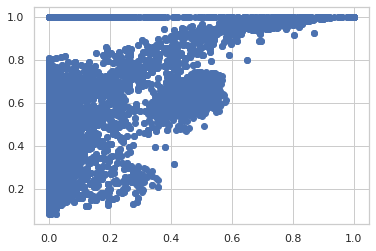

In [163]:

plt.scatter(df.dockQ,df.mm)


Text(0, 0.5, 'TM trRosetta')

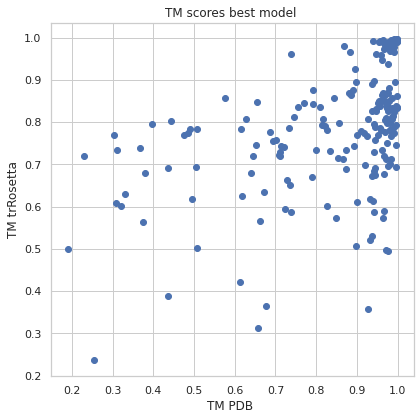

In [164]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_merged = pd.merge(data_max["PDB"],data_max["trRosetta"], on=['code'],how="inner")
plt.scatter(df_merged.tmAB_x,df_merged.tmAB_y,label=d)
ax.set_title("TM scores best model ")
ax.set_xlabel("TM PDB ")
ax.set_ylabel("TM trRosetta")



Text(0, 0.5, 'dockQ')

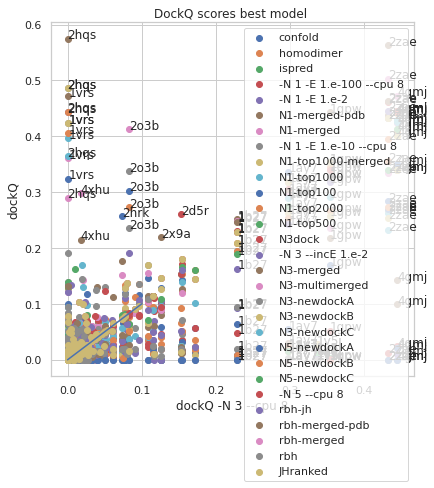

In [165]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    if d=="trRosetta":continue   
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.1]
y=[0,0.1]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

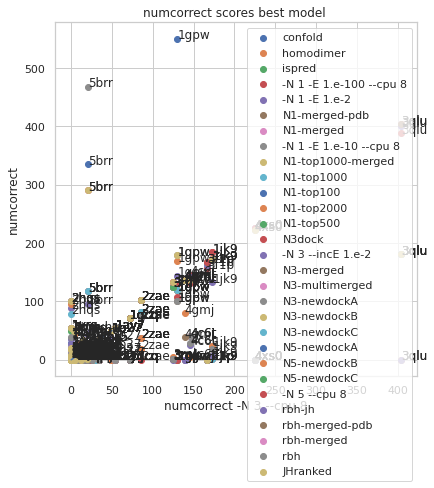

In [166]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue 
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

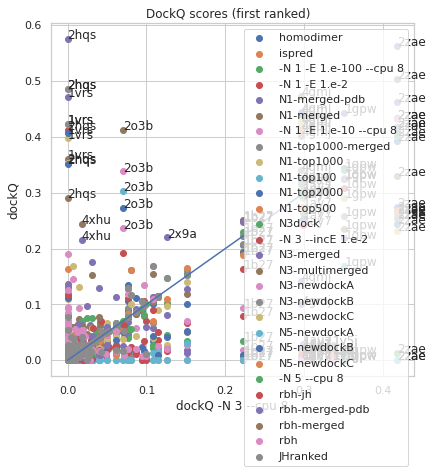

In [167]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

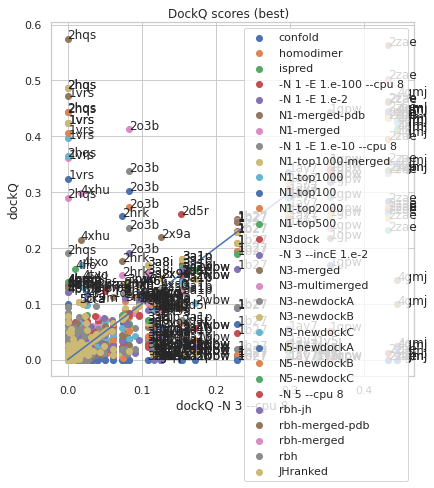

In [168]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

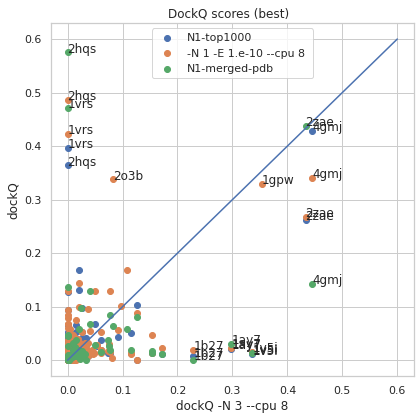

In [169]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [170]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 

Text(0, 0.5, 'dockQ trRosetta')

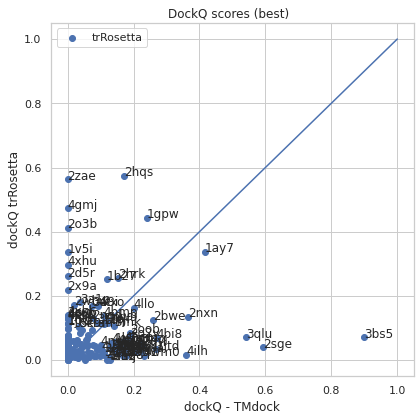

In [171]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-double"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - TMdock")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

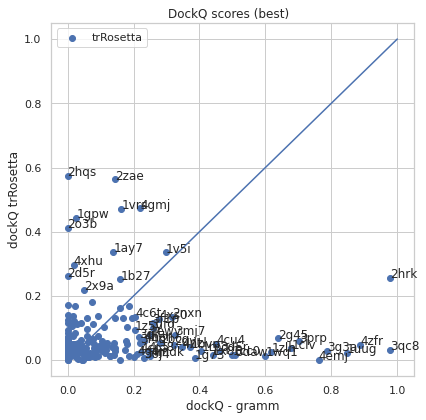

In [172]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [173]:
d="TMdock"
foo=pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
data_first[d].dockQ
foo[["dockQ_x","dockQ_y"]]
#cc=np.corrcoef(foo.dockQ_x,foo.dockQ_y)

foo.dockQ_y.isna().unique()
data_first[d].dockQ.isna().unique()

array([], dtype=bool)

TMdock
0 0


Text(20.200000000000003, 0.5, 'dockQ TMdock')

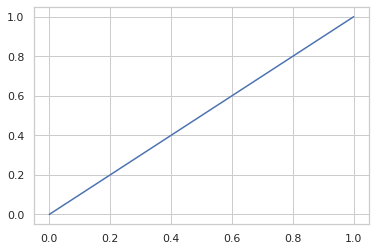

In [174]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock"]:
    #if d!="N1-merged":continue   
    print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    print(df_merged.dockQ_x.shape[0],df_merged.dockQ_y.shape[0])
    #cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_x)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model) ") #, CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock-nohomology')

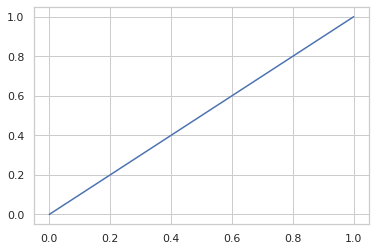

In [175]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-nohomology"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    #cc=np.corrcoef(df_merged.dockQ_y,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock-nohomology")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

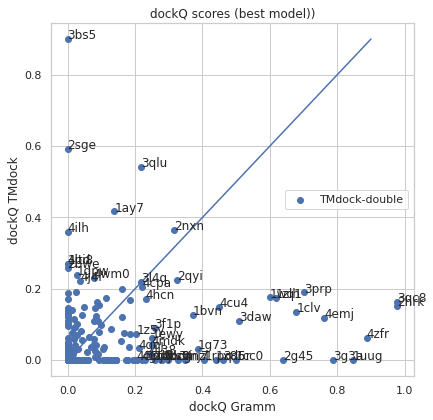

In [176]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model))" )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

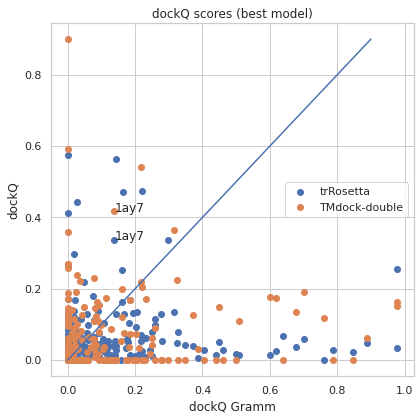

In [177]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (sstr=="3qc8" or sstr=="2hqs" or sstr=="3bs5" ):
        if (sstr=="1ay7" ):
            #if (df_merged.dockQ_y[i]> cutoff and (df_merged.dockQ_y[i]>df_merged.dockQ_x[i])):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model)") 
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [178]:
df_merged = df_max[df_max["params"].isin(["trRosetta","gramm","TMdock-double"])]
df_merged.sort_values("dockQ")

name  lenA  lenB  msa  msaA  msaB  cdhit  \
JHparams      code                                                            
gramm         3cu1  3cu1_u1_A-3cu1_u2_A   132   101  0.0   0.0   0.0  0.038   
              4ged  4ged_u1_A-4ged_u2_A   266   109  0.0   0.0   0.0  0.013   
TMdock-double 3w31  3w31_u1_A-3w31_u2_A   193   150  0.0   0.0   0.0  0.007   
              3wkt  3wkt_u1_A-3wkt_u2_A   604   215  0.0   0.0   0.0  0.010   
gramm         4f7g  4f7g_u1_A-4f7g_u2_A   207   175  0.0   0.0   0.0  0.012   
...                                 ...   ...   ...  ...   ...   ...    ...   
              1uug  1uug_u1_A-1uug_u2_A   230    83  0.0   0.0   0.0  0.656   
              4zfr  4zfr_u1_A-4zfr_u2_A   186    77  0.0   0.0   0.0  0.695   
TMdock-double 3bs5  3bs5_u1_A-3bs5_u2_A    84    76  0.0   0.0   0.0  0.628   
gramm         3qc8  3qc8_u1_A-3qc8_u2_A   169    82  0.0   0.0   0.0  0.857   
              2hrk  2hrk_u1_A-2hrk_u2_A   181   121  0.0   0.0   0.0  0.696   

                    dockQ     fnat     iRMS  ...  CODE         params   tmAB  \
JHparams      code                           ...                               
gramm         3cu1  0.000   13.706   30.130  ...  3cu1          gramm    0.5   
              4ged  0.000   20.229   48.663  ...  4ged          gramm    0.5   
TMdock-double 3w31  0.000   54.147  122.048  ...  3w31  TMdock-double   20.0   
              3wkt  0.000  112.153  231.891  ...  3wkt  TMdock-double    8.5   
gramm         4f7g  0.000   20.195   61.922  ...  4f7g          gramm    0.5   
...                   ...      ...      ...  ...   ...            ...    ...   
              1uug  0.847    3.542    6.927  ...  1uug          gramm    5.0   
              4zfr  0.887    9.940   19.304  ...  4zfr          gramm    0.5   
TMdock-double 3bs5  0.900   16.293   61.530  ...  3bs5  TMdock-double  206.5   
gramm         3qc8  0.977   11.047   18.799  ...  3qc8          gramm    0.5   
              2hrk  0.978   13.721   37.969  ...  2hrk          gramm   61.5   

                    msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams      code                                                    
gramm         3cu1    0.0       1.0        0.0       0.0        0.0   
              4ged    0.0       1.0        0.0       0.0        0.0   
TMdock-double 3w31    0.0      39.0        0.0       1.0        0.0   
              3wkt    0.0      16.0        0.0       1.0        0.0   
gramm         4f7g    0.0       1.0        0.0       0.0        0.0   
...                   ...       ...        ...       ...        ...   
              1uug    0.0       9.0        0.0       1.0        0.0   
              4zfr    0.0       1.0        0.0       0.0        0.0   
TMdock-double 3bs5    0.0     412.0        0.0       1.0        0.0   
gramm         3qc8    0.0       1.0        0.0       0.0        0.0   
              2hrk    0.0     122.0        0.0       1.0        0.0   

                    numcorrect  len  
JHparams      code                   
gramm         3cu1       0.000  233  
              4ged       0.000  375  
TMdock-double 3w31       0.000  343  
              3wkt       0.000  819  
gramm         4f7g       0.000  382  
...                        ...  ...  
              1uug       0.000  313  
              4zfr       0.000  263  
TMdock-double 3bs5       0.986  160  
gramm         3qc8       0.000  251  
              2hrk       0.000  302  

[652 rows x 51 columns]

In [179]:
len(df_merged.loc[df_merged.dockQ>0.2]["CODE"].unique())

58

In [180]:
len(df_merged.loc[(df_merged.params=="trRosetta")&(df_merged.dockQ>0.2 )]["CODE"].unique())

13

In [181]:
len(df_merged.loc[(df_merged.params=="gramm")&(df_merged.dockQ>0.2 )]["CODE"].unique())

40

In [182]:
len(df_merged.loc[(df_merged.params=="TMdock-double")&(df_merged.dockQ>0.2 )]["CODE"].unique())

15

In [183]:
len(df_merged["CODE"].unique())

218

In [184]:
df.loc[df.params=="TMdock-double"].sort_values("dockQ")

name       JHparams lenA lenB msa msaA msaB  cdhit  \
14543  5eg3_u1_A-5eg3_u2_A  TMdock-double  303  105   0    0    0  0.014   
13709  3ona_u1_A-3ona_u2_A  TMdock-double  161   78   0    0    0  0.016   
13708  3ona_u1_A-3ona_u2_A  TMdock-double  161   78   0    0    0  0.026   
13707  3ona_u1_A-3ona_u2_A  TMdock-double  161   78   0    0    0  0.016   
13706  3ona_u1_A-3ona_u2_A  TMdock-double  161   78   0    0    0  0.026   
...                    ...            ...  ...  ...  ..  ...  ...    ...   
13793  3qlu_u1_A-3qlu_u2_A  TMdock-double  384  374   0    0    0  0.398   
13269  2sge_u1_A-2sge_u2_A  TMdock-double  186   57   0    0    0  0.364   
13424  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0   0.56   
13433  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0  0.628   
13428  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0  0.539   

       dockQ    fnat  ...  CODE         params    tmAB msaAB tmAB_max  \
14543      0  19.742  ...  5eg3  TMdock-double     0.5   0.0      1.0   
13709      0   18.45  ...  3ona  TMdock-double    13.0   0.0     25.0   
13708      0  13.859  ...  3ona  TMdock-double    13.0   0.0     25.0   
13707      0  18.312  ...  3ona  TMdock-double    13.0   0.0     25.0   
13706      0  13.966  ...  3ona  TMdock-double    13.0   0.0     25.0   
...      ...     ...  ...   ...            ...     ...   ...      ...   
13793  0.542   3.667  ...  3qlu  TMdock-double  3961.5   0.0   7922.0   
13269  0.593   3.624  ...  2sge  TMdock-double     1.0   0.0      1.0   
13424    0.7   2.688  ...  3bs5  TMdock-double   206.5   0.0    412.0   
13433  0.833   2.384  ...  3bs5  TMdock-double   206.5   0.0    412.0   
13428    0.9   2.876  ...  3bs5  TMdock-double   206.5   0.0    412.0   

      msaAB_max tmAB_min msaAB_min numcorrect  len  
14543       0.0      0.0       0.0          0  408  
13709       0.0      1.0       0.0          0  239  
13708       0.0      1.0       0.0          0  239  
13707       0.0      1.0       0.0          0  239  
13706       0.0      1.0       0.0          0  239  
...         ...      ...       ...        ...  ...  
13793       0.0      1.0       0.0     31.752  758  
13269       0.0      1.0       0.0          0  243  
13424       0.0      1.0       0.0      0.986  160  
13433       0.0      1.0       0.0      0.986  160  
13428       0.0      1.0       0.0      0.986  160  

[2160 rows x 53 columns]

In [185]:
df_merged.groupby(["CODE"]).median().sort_values("dockQ")


lenA   lenB     msa     msaA     msaB     cdhit   dockQ     fnat  \
CODE                                                                      
5eg3  303.0  105.0     0.0      0.0      0.0    0.0340  0.0000  22.4970   
1kgy  188.0  142.0     0.0      0.0      0.0    0.0120  0.0000  20.6540   
1lb2  210.0   82.0     0.0      0.0      0.0    0.0190  0.0000  19.8440   
2wy8  295.0   73.0     0.0      0.0      0.0    0.0220  0.0000  18.7300   
4r62  154.0   77.0     0.0      0.0      0.0    0.0270  0.0000  13.1360   
...     ...    ...     ...      ...      ...       ...     ...      ...   
2hrk  181.0  121.0     0.0      0.0      0.0    0.6960  0.2570  13.7210   
1v5i  276.0   78.0     0.0      0.0      0.0    0.2810  0.2980  16.4660   
2nxn  255.0  148.0     0.0      0.0      0.0    0.1360  0.3170  14.4160   
1vrs  124.0  120.5  1045.5  50159.5  50159.5  989.0375  0.3175   9.2385   
1ay7   97.0   90.0     0.0      0.0      0.0    0.4340  0.3370  12.2940   

          iRMS      LRMS  ...       seqid  rank       tmAB    msaAB  \
CODE                      ...                                         
5eg3   93.4620    1.0000  ...      40.000   0.0   0.500000      0.0   
1kgy  193.1250    1.0000  ...      60.000   0.0   1.500000      0.0   
1lb2  165.2820    1.0000  ...      26.667   0.0   0.500000      0.0   
2wy8   54.6240    1.0000  ...     100.000   0.0   0.500000      0.0   
4r62   92.9340    1.0000  ...      10.000   0.0   0.500000      0.0   
...        ...       ...  ...         ...   ...        ...      ...   
2hrk   75.1980    1.0000  ...      19.718   0.0  61.500000      0.0   
1v5i   69.6880    1.0000  ...      10.000   0.0   1.500000      0.0   
2nxn  200.1340    1.0000  ...      10.000   0.0  17.000000      0.0   
1vrs  130.8735  229.6605  ...  168172.231   1.0   0.567912  25780.5   
1ay7   72.0320    1.0000  ...      10.000   0.0  31.000000      0.0   

        tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect    len  
CODE                                                                 
5eg3    1.000000        0.0   0.00000        0.0       0.000  408.0  
1kgy    2.000000        0.0   1.00000        0.0       0.000  330.0  
1lb2    1.000000        0.0   0.00000        0.0       0.000  292.0  
2wy8    1.000000        0.0   0.00000        0.0       0.000  368.0  
4r62    1.000000        0.0   0.00000        0.0       0.000  231.0  
...          ...        ...       ...        ...         ...    ...  
2hrk  122.000000        0.0   1.00000        0.0       0.000  302.0  
1v5i    2.000000        0.0   1.00000        0.0       0.000  354.0  
2nxn   33.000000        0.0   1.00000        0.0       0.000  403.0  
1vrs    0.642455    50159.5   0.49337     1401.5      26.994  241.0  
1ay7   61.000000        0.0   1.00000        0.0       2.001  187.0  

[218 rows x 48 columns]

Text(0, 0.5, 'dockQ TMdock')

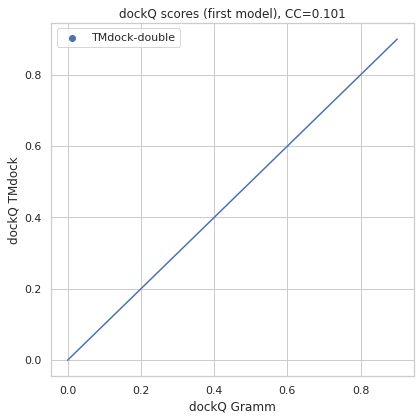

In [186]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock TMdock-double')

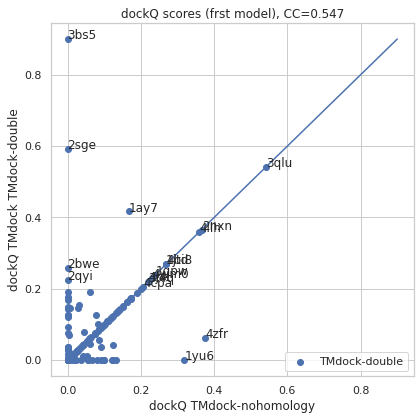

In [187]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-nohomology"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock-nohomology")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock trRosetta')

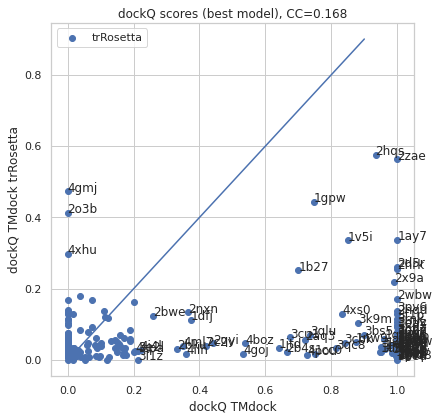

In [188]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0, 0.5, 'dockQ  PDB')

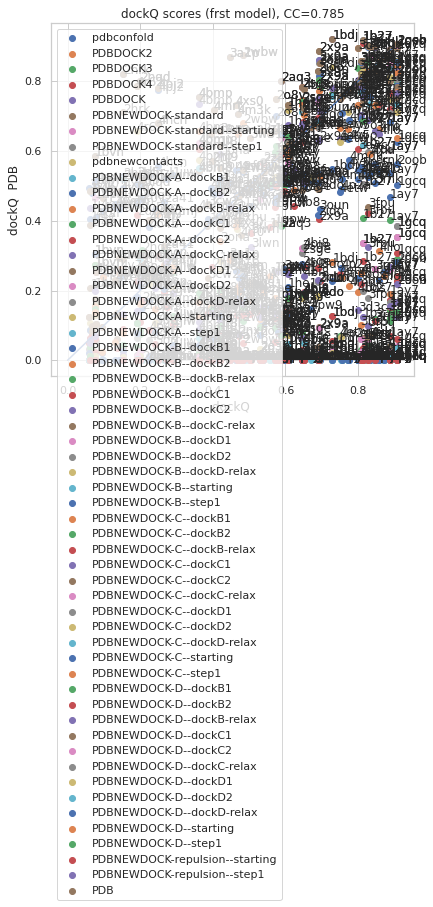

In [189]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-repulsion--step1')

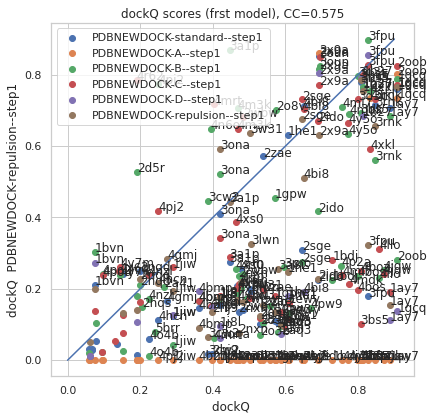

In [190]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*step1.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDB')

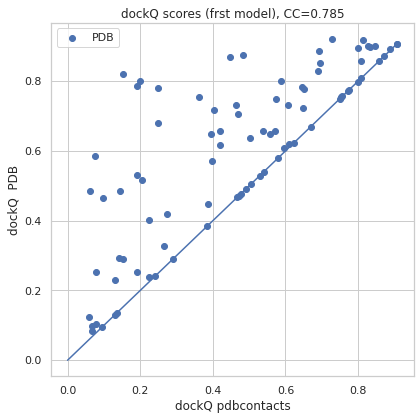

In [191]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("pdbconfold")
pdbset=list(filter(r.match, datasets))
pdbset=["PDB"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]- df_merged.dockQ_x[i]>cutoff):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ pdbcontacts")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  pdbconfold')

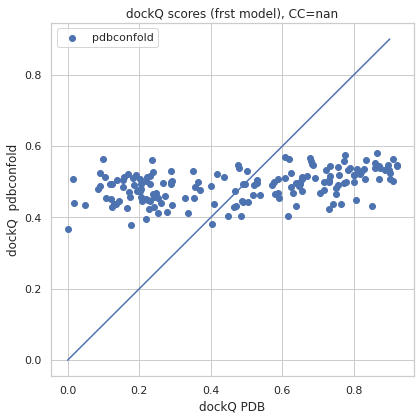

In [192]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("pdbconfold")
pdbset=list(filter(r.match, datasets))
pdbset=["pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]- df_merged.dockQ_x[i]>cutoff):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ PDB")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ  pdbconfold')

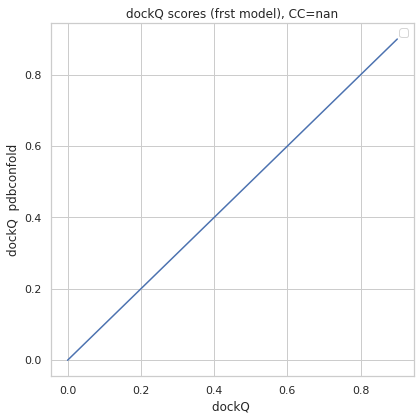

In [193]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-[ABCD]$")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockB-relax')

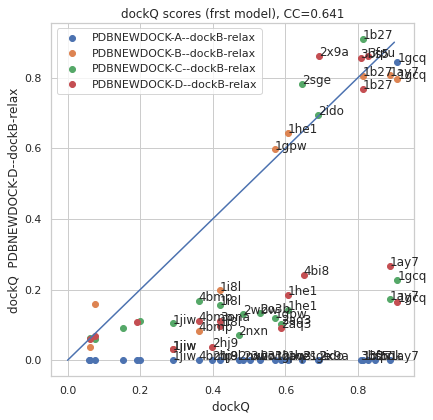

In [194]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockB-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockC-relax')

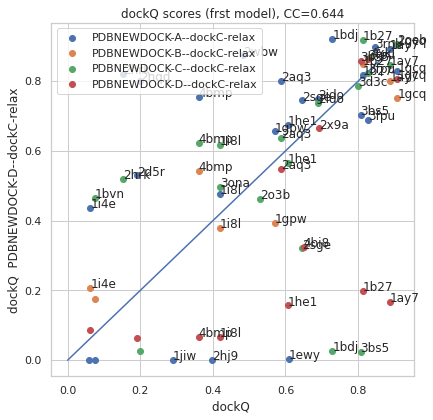

In [195]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockC-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockD-relax')

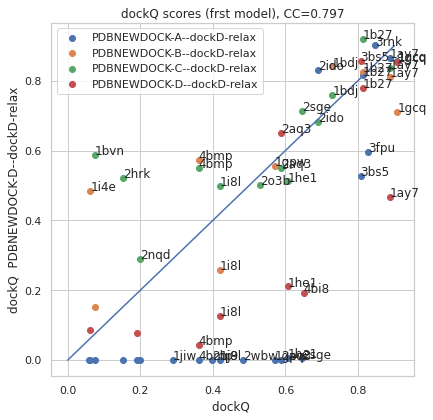

In [196]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockD-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDBNEWDOCK-C'

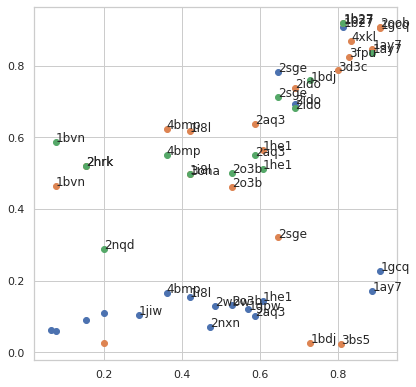

KeyError: 'PDBNEWDOCK-C'

In [197]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDBNEWDOCK-B'

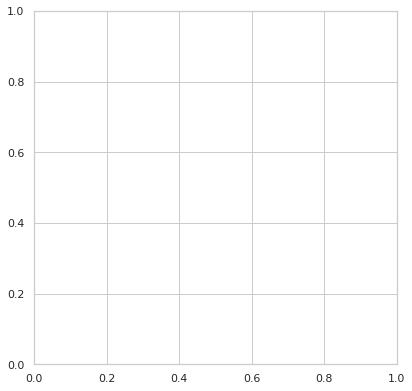

KeyError: 'PDBNEWDOCK-B'

In [198]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDBNEWDOCK-repulsion'

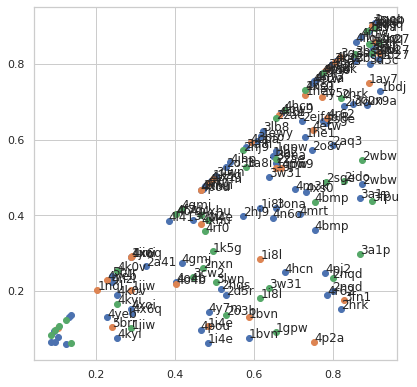

KeyError: 'PDBNEWDOCK-repulsion'

In [199]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard","PDBNEWDOCK-repulsion","pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    #if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [200]:
r=re.compile(".*relax.*")
#pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]
pdbset=sorted(["PDB","PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax","pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard",
               "PDBNEWDOCK-repulsion","pdbconfold"])


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A--dockC-relax")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-C")&(df_max.params.isin(pdbset) )]["CODE"].unique()

codes=smallset

In [201]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()

PDB
PDBNEWDOCK-A--dockC-relax
PDBNEWDOCK-B
PDBNEWDOCK-B--dockD-relax
PDBNEWDOCK-C
PDBNEWDOCK-C--dockC-relax
PDBNEWDOCK-C--dockD-relax
PDBNEWDOCK-repulsion
PDBNEWDOCK-standard
pdbconfold
pdbcontacts
pdbnewcontacts


IndexError: index out of bounds

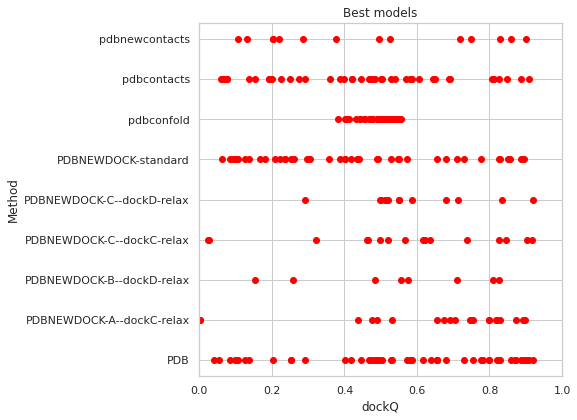

IndexError: index out of bounds

In [202]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [203]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [204]:
pdbset=[ 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA','N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8',"-N 3 --cpu 8"]
codes=df_max.loc[(df_max.params=="N3-newdockC")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes

array(['1ay7', '1b27', '1bvn', '1gcq', '1gpw', '1he1', '1i4e', '1i8l',
       '2aq3', '2b4s', '2d5r', '2hj9', '2hrk', '2ido', '2nqd', '2nxn',
       '2o3b', '2sge', '2wbw', '2x9a', '2zae', '3a1p', '3a8i', '3bs5',
       '3cw2', '3fpu', '3lwn', '3ona', '3rnk', '3w31', '4bi8', '4bmp',
       '4gmj', '4hcn', '4xhu'], dtype=object)

Text(0, 0.5, 'dockQ  -N 3 --cpu 8')

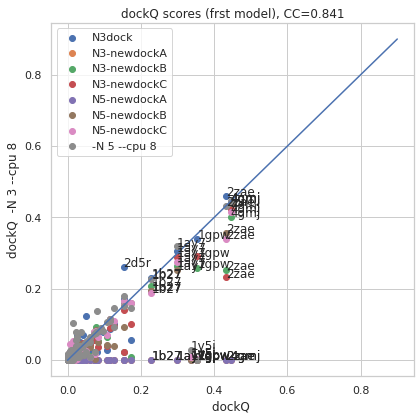

In [205]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="-N 3 --cpu 8":continue
    df_merged = pd.merge(data_max["-N 3 --cpu 8"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

-N 3 --cpu 8 35
-N 5 --cpu 8 35
N3-newdockA 34
N3-newdockB 30
N3-newdockC 35
N3dock 35
N5-newdockA 35
N5-newdockB 35
N5-newdockC 35


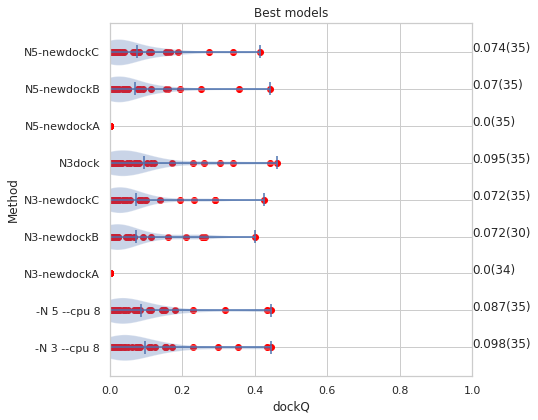

In [206]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    print (d,len(data[i]))
    i+=1
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [207]:
pdbset=sorted(["N1","N3"])

In [208]:
for d in pdbset:
    print (d,len(df_max.loc[(df_max.params==d)]["CODE"].unique()))

N1 0
N3 0


In [209]:
all_df

JHparams  code                 name  lenA  lenB     msa     msaA  \
0    -N 3 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  1060.0   2034.0   
1    -N 3 --cpu 8  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   2034.0   
2    -N 3 --cpu 8  1bvn  1bvn_u2_A-1bvn_u1_A   496   496    95.0  52623.0   
3    -N 3 --cpu 8  1gcq  1gcq_u2_A-1gcq_u1_A    66    66  1365.0  77704.0   
4    -N 3 --cpu 8  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7137.0  67629.0   
..            ...   ...                  ...   ...   ...     ...      ...   
304   N5-newdockC  4bi8  4bi8_u1_A-4bi8_u2_A   164    94    51.0    291.0   
305   N5-newdockC  4bmp  4bmp_u1_A-4bmp_u2_A   301   118  4607.0   9429.0   
306   N5-newdockC  4gmj  4gmj_u2_A-4gmj_u1_A   253   253  1189.0   6344.0   
307   N5-newdockC  4hcn  4hcn_u1_A-4hcn_u2_A   250    77     1.0     20.0   
308   N5-newdockC  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   9970.0   

        msaB   cdhit  dockQ  ...  CODE        params      tmAB    msaAB  \
0     2034.0  1026.0  0.298  ...  1ay7  -N 3 --cpu 8  0.828190   1759.5   
1     2034.0   656.0  0.229  ...  1b27  -N 3 --cpu 8  0.824750   1759.0   
2    52623.0    85.0  0.013  ...  1bvn  -N 3 --cpu 8  0.619740  26373.0   
3    77704.0   771.0  0.115  ...  1gcq  -N 3 --cpu 8  0.555390  77600.5   
4    67629.0  5348.0  0.354  ...  1gpw  -N 3 --cpu 8  0.889770  63047.5   
..       ...     ...    ...  ...   ...           ...       ...      ...   
304    382.0    50.0  0.026  ...  4bi8   N5-newdockC  0.695005    336.5   
305  15729.0  2901.0  0.004  ...  4bmp   N5-newdockC  0.811060  12579.0   
306   6344.0   546.0  0.414  ...  4gmj   N5-newdockC  0.831935   3998.5   
307  41925.0     1.0  0.014  ...  4hcn   N5-newdockC  0.467315  20972.5   
308   9970.0   240.0  0.007  ...  4xhu   N5-newdockC  0.730560   5259.0   

     tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
0     0.84625     2034.0   0.81013     1485.0      53.985  187  
1     0.85428     2034.0   0.79522     1484.0      49.025  199  
2     0.70905    52623.0   0.53043      123.0       0.000  571  
3     0.63426    77704.0   0.52080    77497.0      71.760  123  
4     0.89718    67629.0   0.88236    58466.0     130.000  456  
..        ...        ...       ...        ...         ...  ...  
304   0.78100      382.0   0.60901      291.0       0.000  258  
305   0.86858    15729.0   0.75354     9429.0       0.000  419  
306   0.85148     6344.0   0.82721     1653.0     139.104  489  
307   0.61756    41925.0   0.31707       20.0       0.000  327  
308   0.75557     9970.0   0.70555      548.0       0.000  447  

[309 rows x 53 columns]

In [210]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


In [211]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [212]:
r=re.compile(".*relax.*")
pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts","pdbconfold","PDB"]


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A")&(df_max.params.isin(pdbset) )]["CODE"].unique()


ValueError: zero-size array to reduction operation minimum which has no identity

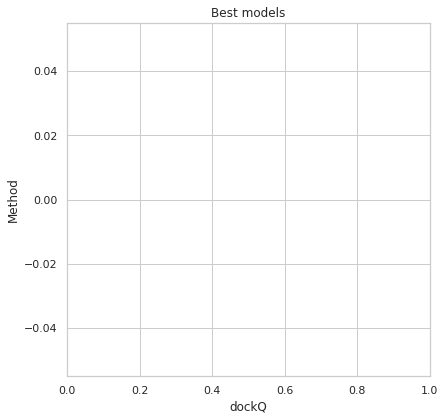

ValueError: zero-size array to reduction operation minimum which has no identity

In [213]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [214]:
codes

array([], dtype=object)

In [215]:
all_df

Empty DataFrame
Columns: [JHparams, code, name, lenA, lenB, msa, msaA, msaB, cdhit, dockQ, fnat, iRMS, LRMS, fnonnat, mm, tmA, tmB, long, med, longPPV, medPPV, longA, medA, longPPVA, medPPVA, longB, medB, longPPVB, medPPVB, short, shortPPV, shortA, shortPPVA, shortB, shortPPVB, shortpdb, medpdb, longpdb, avprob, auc, evalue, seqid, rank, CODE, params, tmAB, msaAB, tmAB_max, msaAB_max, tmAB_min, msaAB_min, numcorrect, len]
Index: []

[0 rows x 53 columns]

IndexError: index out of bounds

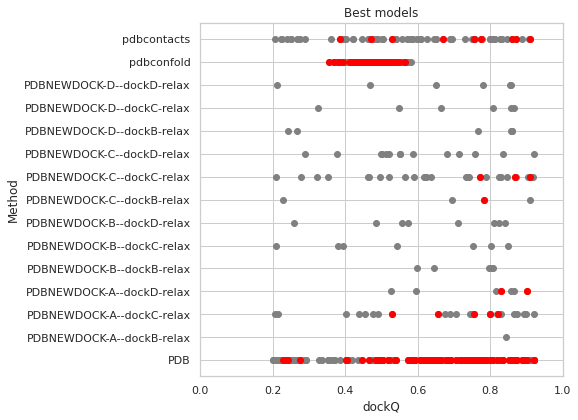

IndexError: index out of bounds

In [216]:
# FInd best method for each model.
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


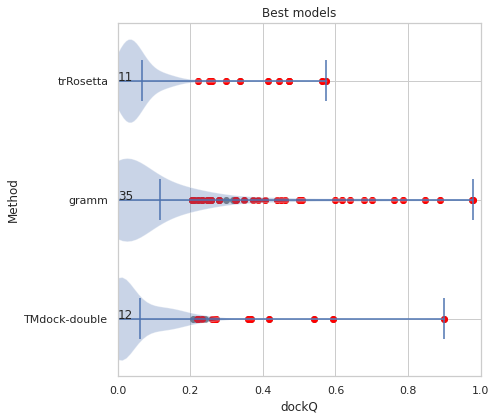

In [217]:
compareset=["trRosetta","gramm","TMdock-double"]
codes=df_max.loc[df_max.params.isin(compareset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(compareset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(compareset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(compareset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        #ax.annotate(str(round(average[best_df.JHparams[i]],3))+
        #            "("+str(length[good_df.JHparams[i]])+")"
        #            ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [218]:
best_df

index       JHparams  code                 name  lenA  lenB     msa  \
0     899          gramm  2hrk  2hrk_u1_A-2hrk_u2_A   181   121     0.0   
1     910          gramm  3qc8  3qc8_u1_A-3qc8_u2_A   169    82     0.0   
2     845  TMdock-double  3bs5  3bs5_u1_A-3bs5_u2_A    84    76     0.0   
3     923          gramm  4zfr  4zfr_u1_A-4zfr_u2_A   186    77     0.0   
4     891          gramm  1uug  1uug_u1_A-1uug_u2_A   230    83     0.0   
5     905          gramm  3g3a  3g3a_u1_A-3g3a_u2_A   166   130     0.0   
6     915          gramm  4emj  4emj_u1_A-4emj_u2_A   403   106     0.0   
7     909          gramm  3prp  3prp_u1_A-3prp_u2_A   184    77     0.0   
8     886          gramm  1clv  1clv_u1_A-1clv_u2_A   471    33     0.0   
9     898          gramm  2g45  2g45_u1_A-2g45_u2_A   114    77     0.0   
10    896          gramm  1zlh  1zlh_u1_A-1zlh_u2_A   306    76     0.0   
11    893          gramm  1wq1  1wq1_u1_A-1wq1_u2_A   325   167     0.0   
12    844  TMdock-double  2sge  2sge_u1_A-2sge_u2_A   186    57     0.0   
13   1226      trRosetta  2hqs  2hqs_u2_A-2hqs_u1_A   398   398  2536.0   
14   1230      trRosetta  2zae  2zae_u2_A-2zae_u1_A   107   107  1125.0   
15    847  TMdock-double  3qlu  3qlu_u1_A-3qlu_u2_A   384   374     0.0   
16    903          gramm  3daw  3daw_u1_A-3daw_u2_A   360   143     0.0   
17    885          gramm  1cc0  1cc0_u1_A-1cc0_u2_A   178   149     0.0   
18   1231      trRosetta  4gmj  4gmj_u2_A-4gmj_u1_A   253   253  1189.0   
19   1224      trRosetta  1vrs  1vrs_u2_A-1vrs_u1_A   124   124  2091.0   
20    902          gramm  3d5r  3d5r_u1_A-3d5r_u2_A   295    62     0.0   
21    914          gramm  4cu4  4cu4_u1_A-4cu4_u2_A   706    22     0.0   
22   1222      trRosetta  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7203.0   
23    894          gramm  1x86  1x86_u1_A-1x86_u2_A   353   181     0.0   
24    838  TMdock-double  1ay7  1ay7_u1_A-1ay7_u2_A    97    90     0.0   
25   1228      trRosetta  2o3b  2o3b_u2_A-2o3b_u1_A   240   240   456.0   
26    890          gramm  1rpq  1rpq_u1_A-1rpq_u2_A   174    22     0.0   
27    888          gramm  1g73  1g73_u1_A-1g73_u2_A   174    97     0.0   
28    884          gramm  1bvn  1bvn_u1_A-1bvn_u2_A   496    75     0.0   
29    842  TMdock-double  2nxn  2nxn_u1_A-2nxn_u2_A   255   148     0.0   
30    850  TMdock-double  4ilh  4ilh_u1_A-4ilh_u2_A   301   256     0.0   
31    921          gramm  4nzl  4nzl_u1_A-4nzl_u2_A   219   100     0.0   
32   1223      trRosetta  1v5i  1v5i_u2_A-1v5i_u1_A   276   276  1922.0   
33    907          gramm  3mj7  3mj7_u1_A-3mj7_u2_A   228   187     0.0   
34    901          gramm  2qyi  2qyi_u1_A-2qyi_u2_A   224   180     0.0   
35   1232      trRosetta  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   
36    897          gramm  2bcg  2bcg_u1_A-2bcg_u2_A   440   179     0.0   
37    922          gramm  4xs0  4xs0_u1_A-4xs0_u2_A   147   141     0.0   
38    848  TMdock-double  4bi8  4bi8_u1_A-4bi8_u2_A   164    94     0.0   
39    840  TMdock-double  1jtd  1jtd_u1_A-1jtd_u2_A   270   264     0.0   
40   1225      trRosetta  2d5r  2d5r_u2_A-2d5r_u1_A   265   265   521.0   
41    841  TMdock-double  2bwe  2bwe_u1_A-2bwe_u2_A    78    47     0.0   
42    889          gramm  1lfd  1lfd_u1_A-1lfd_u2_A   167    88     0.0   
43    904          gramm  3f1p  3f1p_u1_A-3f1p_u2_A   120   115     0.0   
44   1221      trRosetta  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   
45    887          gramm  1ewy  1ewy_u1_A-1ewy_u2_A   304    99     0.0   
46    920          gramm  4mdk  4mdk_u1_A-4mdk_u2_A   165    77     0.0   
47    919          gramm  4j38  4j38_u1_A-4j38_u2_A   152   124     0.0   
48    918          gramm  4hcn  4hcn_u1_A-4hcn_u2_A   250    77     0.0   
49    908          gramm  3oj4  3oj4_u1_A-3oj4_u2_A   151    77     0.0   
50    852  TMdock-double  4wm0  4wm0_u1_A-4wm0_u2_A   291    40     0.0   
51    913          gramm  4cpa  4cpa_u1_A-4cpa_u2_A   308    40     0.0   
52    851  TMdock-double  4j4

In [219]:
codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1clv', '1dfj',
       '1eay', '1eer', '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq',
       '1gg2', '1gpw', '1he1', '1i2m', '1i4e', '1i8l', '1ib1', '1jiw',
       '1jk9', '1jtd', '1k5g', '1kgy', '1lb2', '1lfd', '1mq8', '1nbf',
       '1nql', '1nw9', '1oc0', '1pvh', '1qav', '1r8s', '1rpq', '1s1q',
       '1te1', '1tmq', '1uug', '1v5i', '1vg0', '1wq1', '1wrd', '1x86',
       '1xt9', '1y64', '1y8x', '1ycs', '1yu6', '1yvb', '1z5y', '1zlh',
       '2a41', '2a5d', '2a9k', '2abz', '2aq3', '2b4s', '2bcg', '2bcn',
       '2bku', '2bwe', '2c0l', '2c2v', '2ch4', '2d5r', '2ejf', '2g45',
       '2grx', '2gwf', '2hj9', '2hqs', '2hrk', '2i25', '2ido', '2iwt',
       '2nqd', '2nxn', '2o25', '2o2v', '2o3b', '2o8v', '2oob', '2qyi',
       '2sge', '2uy7', '2v55', '2vdb', '2vrr', '2wbw', '2wy7', '2wy8',
       '2x9a', '2xgy', '2xwb', '2zae', '3a1p', '3a8i', '3av0', '3bh6',
       '3bs5', '3buz', '3bx1', '3cbk', '3cu1', '3cw2', '3d3c', '3d5r',
      

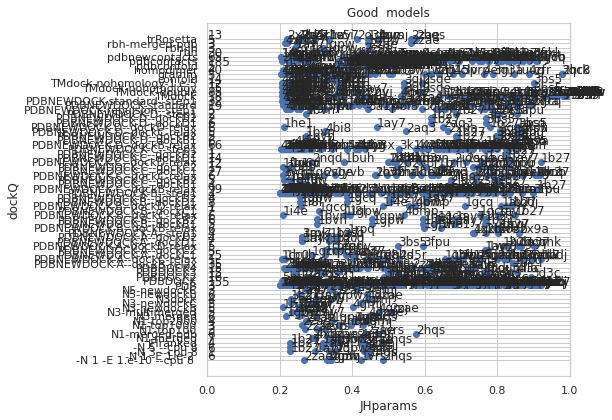

In [220]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

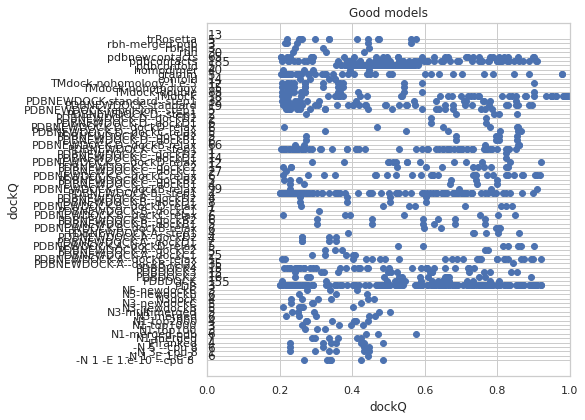

In [221]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

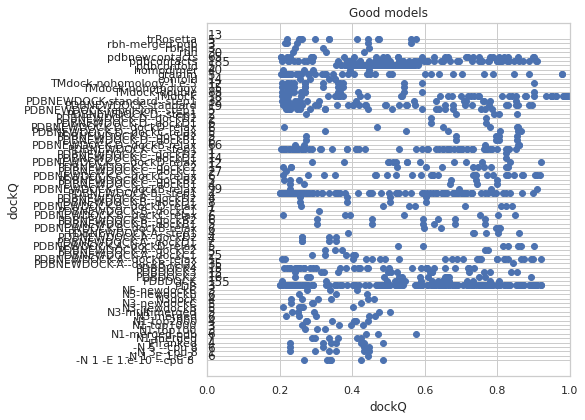

In [222]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

In [223]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [224]:
# here we find what method is best for each target

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)
excludecolumns+=["confold","rbh-merged-pdb"]
tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

['gramm', 'pdbconfold', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax', 'PDBNEWDOCK-C--star

index        JHparams  code                 name  lenA  lenB     msa  \
5       9    -N 3 --cpu 8  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7137.0   
6      10    -N 3 --cpu 8  1v5i  1v5i_u2_A-1v5i_u1_A   276   276  1922.0   
7      13    -N 5 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  1060.0   
4      26       N1-merged  2o3b  2o3b_u2_A-2o3b_u1_A   240   240   456.0   
8      29       N1-merged  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   
0      31   N1-merged-pdb  2hqs  2hqs_u2_A-2hqs_u1_A   398   398  2368.0   
3      30   N1-merged-pdb  1vrs  1vrs_u2_A-1vrs_u1_A   124   124   836.0   
10     47       N3-merged  1b27  1b27_u1_A-1b27_u2_A   109    90   733.0   
1      54  N3-multimerged  2zae  2zae_u1_A-2zae_u2_A   107    93  1125.0   
2      55  N3-multimerged  4gmj  4gmj_u1_A-4gmj_u2_A   253   236  1189.0   
9      68          N3dock  2d5r  2d5r_u2_A-2d5r_u1_A   265   265   521.0   

       msaA     msaB   cdhit  ...  CODE          params      tmAB    msaAB  \
5   67629.0  67629.0  5348.0  ...  1gpw    -N 3 --cpu 8  0.889770  63047.5   
6   54177.0  54177.0  1646.0  ...  1v5i    -N 3 --cpu 8  0.826270  33121.5   
7    2034.0   2034.0   989.0  ...  1ay7    -N 5 --cpu 8  0.830380   1759.5   
4    5431.0   5431.0   301.0  ...  2o3b       N1-merged  0.727490   2974.5   
8    8381.0   8381.0   234.0  ...  4xhu       N1-merged  0.829155   4344.0   
0    9156.0   9156.0  1989.0  ...  2hqs   N1-merged-pdb  0.969605   6972.0   
3    1396.0   1396.0   806.0  ...  1vrs   N1-merged-pdb  0.989810   1320.5   
10   1484.0   2034.0   654.0  ...  1b27       N3-merged  0.801155   1759.0   
1    1659.0   1521.0   839.0  ...  2zae  N3-multimerged  0.791460   1590.0   
2    6152.0   1646.0   523.0  ...  4gmj  N3-multimerged  0.804275   3899.0   
9    6154.0   6154.0   226.0  ...  2d5r          N3dock  0.774685   3962.5   

    tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
5    0.89718    67629.0   0.88236    58466.0     130.000  456  
6    0.89294    54177.0   0.75960    12066.0       1.000  354  
7    0.84095     2034.0   0.81981     1485.0      53.985  187  
4    0.83406     5431.0   0.62495      518.0      29.008  384  
8    0.84232     8381.0   0.81599      307.0      19.910  447  
0    0.97016     9156.0   0.96905     4788.0     100.035  507  
3    0.99288     1396.0   0.98674     1245.0      53.988  241  
10   0.83041     2034.0   0.77190     1484.0      49.025  199  
1    0.83026     1659.0   0.75266     1521.0      80.990  200  
2    0.82865     6152.0   0.77990     1646.0     139.104  489  
9    0.87927     6154.0   0.68937     1771.0      17.996  386  

[11 rows x 54 columns]

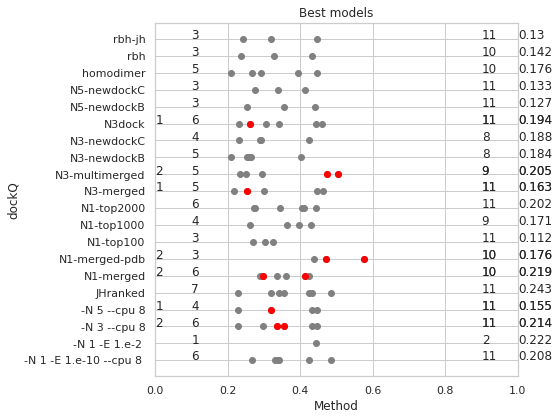

In [225]:
# FInd best method for each model.
codes=best_df["code"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
for d in datasets:
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))
        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))


In [226]:
df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

name                 JHparams lenA lenB   msa    msaA  \
17085  1qav_u1_A-1qav_u2_A                   TMdock  113   88     0       0   
17025  1mq8_u1_A-1mq8_u2_A                   TMdock  186  176     0       0   
17525  2nqd_u1_A-2nqd_u2_A                   TMdock  221  111     0       0   
18055  3ona_u1_A-3ona_u2_A                   TMdock  161   78     0       0   
17915  3g3a_u1_A-3g3a_u2_A                   TMdock  166  130     0       0   
...                    ...                      ...  ...  ...   ...     ...   
7696   3wkt_u1_A-3wkt_u2_A      PDBNEWDOCK-standard  604  215  1353   51548   
7426   5eg3_u1_A-5eg3_u2_A              pdbcontacts  303  105   421  565997   
7564   4yoc_u1_A-4yoc_u2_A                 PDBDOCK4  905  530   333   31492   
16444  4ol0_u1_A-4ol0_u2_A        TMdock-nohomology  890  206     0       0   
4122   4c0o_u2_A-4c0o_u1_A  -N 1 -E 1.e-10 --cpu 8   114  890   476    2618   

        msaB  cdhit  dockQ    fnat  ...  CODE                   params  \
17085      0      1      1   0.001  ...  1qav                   TMdock   
17025      0      1      1       0  ...  1mq8                   TMdock   
17525      0      1      1       0  ...  2nqd                   TMdock   
18055      0      1      1       0  ...  3ona                   TMdock   
17915      0      1      1       0  ...  3g3a                   TMdock   
...      ...    ...    ...     ...  ...   ...                      ...   
7696    3679   1026  0.097     0.2  ...  3wkt      PDBNEWDOCK-standard   
7426   25926    205  0.094       0  ...  5eg3              pdbcontacts   
7564    4076    187  0.054   0.159  ...  4yoc                 PDBDOCK4   
16444      0  0.037  0.053  20.385  ...  4ol0        TMdock-nohomology   
4122    2762    285  0.021       0  ...  4c0o  -N 1 -E 1.e-10 --cpu 8    

             tmAB     msaAB   tmAB_max msaAB_max tmAB_min msaAB_min  \
17085  480.500000       0.0  960.00000       0.0  1.00000       0.0   
17025    0.500000       0.0    1.00000       0.0  0.00000       0.0   
17525    3.500000       0.0    6.00000       0.0  1.00000       0.0   
18055   13.000000       0.0   25.00000       0.0  1.00000       0.0   
17915    0.500000       0.0    1.00000       0.0  0.00000       0.0   
...           ...       ...        ...       ...      ...       ...   
7696     0.310460   27613.5    0.31125   51548.0  0.30967    3679.0   
7426     0.909250  295961.5    0.91808  565997.0  0.90042   25926.0   
7564     0.253670   17784.0    0.32173   31492.0  0.18561    4076.0   
16444    1.500000       0.0    2.00000       0.0  1.00000       0.0   
4122     0.497665    2690.0    0.55139    2762.0  0.44394    2618.0   

      numcorrect   len  
17085          0   201  
17025          0   362  
17525          0   332  
18055          0   239  
17915          0   296  
...          ...   ...  
7696           0   819  
7426           0   408  
7564           0  1435  
16444          0  1096  
4122           0  1004  

[218 rows x 53 columns]

In [227]:
df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()


JHparams  lenA  lenB     msa      msaA      msaB  \
name                                                                        
1ay7_u1_A-1ay7_u2_A        rbh-jh    97    90  1060.0    1485.0    2034.0   
1ay7_u2_A-1ay7_u1_A     homodimer    90    97  1060.0    2034.0    1485.0   
1b27_u1_A-1b27_u2_A     homodimer   109    90   733.0    1484.0    2034.0   
1b27_u2_A-1b27_u1_A     homodimer    90   109   733.0    2034.0    1484.0   
1gpw_u1_A-1gpw_u2_A        rbh-jh   252   204  7137.0   58466.0   67629.0   
1gpw_u2_A-1gpw_u1_A        rbh-jh   204   252  7137.0   67629.0   58466.0   
1v5i_u1_A-1v5i_u2_A  -N 3 --cpu 8   276    78  1922.0   54177.0   12066.0   
1vrs_u1_A-1vrs_u2_A    N1-top2000   124   117   836.0  100319.0    2803.0   
1vrs_u2_A-1vrs_u1_A    N1-top2000   117   124  2091.0    2803.0  100319.0   
2d5r_u2_A-2d5r_u1_A        N3dock   121   265   521.0    1771.0    6154.0   
2hqs_u1_A-2hqs_u2_A    N1-top2000   398   109  2396.0  376708.0   32336.0   
2hqs_u2_A-2hqs_u1_A    N1-top2000   109   398  2396.0   15892.0   13281.0   
2o3b_u1_A-2o3b_u2_A           rbh   240   144   100.0    5431.0     518.0   
2zae_u1_A-2zae_u2_A        rbh-jh   107    93  1125.0    1818.0    1521.0   
2zae_u2_A-2zae_u1_A        rbh-jh    93   107  1125.0    1521.0    1818.0   
4gmj_u1_A-4gmj_u2_A     homodimer   253   236  1189.0    6344.0    1653.0   
4gmj_u2_A-4gmj_u1_A     homodimer   236   253  1189.0    1653.0    6344.0   
4xhu_u1_A-4xhu_u2_A     N1-merged   352    95   211.0    8381.0     307.0   
4xhu_u2_A-4xhu_u1_A     N1-merged    95   352   410.0     307.0    8381.0   

                      cdhit  dockQ   fnat    iRMS  ...  CODE        params  \
name                                               ...                       
1ay7_u1_A-1ay7_u2_A  1026.0  0.319  0.306   4.002  ...  1ay7        rbh-jh   
1ay7_u2_A-1ay7_u1_A   989.0  0.260  0.306   4.433  ...  1ay7     homodimer   
1b27_u1_A-1b27_u2_A   654.0  0.252  0.160   4.793  ...  1b27     homodimer   
1b27_u2_A-1b27_u1_A   656.0  0.229  0.160   5.319  ...  1b27     homodimer   
1gpw_u1_A-1gpw_u2_A  5348.0  0.351  0.320   5.201  ...  1gpw        rbh-jh   
1gpw_u2_A-1gpw_u1_A  5343.0  0.354  0.333   3.738  ...  1gpw        rbh-jh   
1v5i_u1_A-1v5i_u2_A  1642.0  0.336  0.191   3.748  ...  1v5i  -N 3 --cpu 8   
1vrs_u1_A-1vrs_u2_A   806.0  0.472  0.449   2.953  ...  1vrs    N1-top2000   
1vrs_u2_A-1vrs_u1_A  1977.0  0.324  0.306   7.831  ...  1vrs    N1-top2000   
2d5r_u2_A-2d5r_u1_A   225.0  0.261  0.203  10.074  ...  2d5r        N3dock   
2hqs_u1_A-2hqs_u2_A  2014.0  0.575  0.526   3.771  ...  2hqs    N1-top2000   
2hqs_u2_A-2hqs_u1_A  2017.0  0.480  0.395   2.806  ...  2hqs    N1-top2000   
2o3b_u1_A-2o3b_u2_A    99.0  0.413  0.556   4.959  ...  2o3b           rbh   
2zae_u1_A-2zae_u2_A   839.0  0.503  0.387   6.495  ...  2zae        rbh-jh   
2zae_u2_A-2zae_u1_A   852.0  0.461  0.484   6.490  ...  2zae        rbh-jh   
4gmj_u1_A-4gmj_u2_A   523.0  0.473  0.756   3.975  ...  4gmj     homodimer   
4gmj_u2_A-4gmj_u1_A   546.0  0.445  0.780   4.389  ...  4gmj     homodimer   
4xhu_u1_A-4xhu_u2_A    83.0  0.244  0.185   5.002  ...  4xhu     N1-merged   
4xhu_u2_A-4xhu_u1_A   234.0  0.298  0.481   4.861  ...  4xhu     N1-merged   

                         tmAB     msaAB  tmAB_max  msaAB_max  tmAB_min  \
name                                                                     
1ay7_u1_A-1ay7_u2_A  0.830380    1759.5   0.84625     2034.0   0.81981   
1ay7_u2_A-1ay7_u1_A  0.817620    1759.5   0.84181     2034.0   0.79459   
1b27_u1_A-1b27_u2_A  0.825820    1759.0   0.85658     2034.0   0.79542   
1b27_u2_A-1b27_u1_A  0.810645    1759.0   0.83444     2034.0   0.78685   
1gpw_u1_A-1gpw_u2_A  0.889680   63047.5   0.89449    67629.0   0.88822   
1gpw_u2_A-1gpw_u1_A  0.894335   63047.5   0.89745    67629.0   0.89220   
1v5i_u1_A-1v5i_u2_A  0.818890   33121.5   0.88557    54177.0   0.75221   
1vrs_u1_A-1vrs_u2_A  0.989810   51561.0   0.99288   100319.0   0.98674   
1vrs_u2_A-1vrs_u1_A  0.89746

['gramm', 'pdbconfold', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax', 'PDBNEWDOCK-C--star

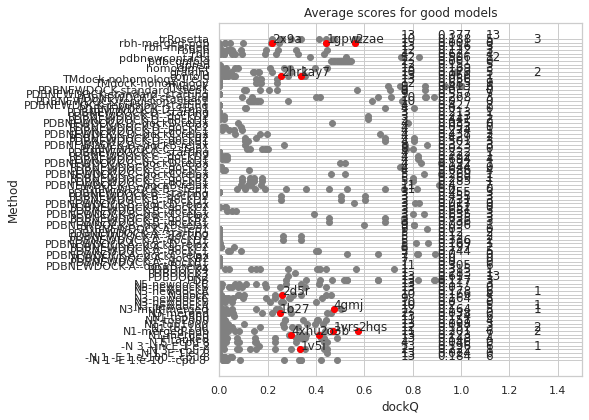

In [228]:
r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print (excludecolumns)
includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()
codes=new_df.CODE.unique()
#print(new_df)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()
plt.scatter(tempdf.dockQ,tempdf.params,color="grey")
#print(tempdf[tempdf.params=="N1-top1000"])
plt.scatter(new_df.dockQ,new_df.params,color="red")
#print(new_df[new_df.params=="N1-top1000"])

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Average scores for good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("Method")
ax.set(xlim=[0,1])
done={}
average={}
length={}
ax.set(xlim=[0,1.5])
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])
for i, txt in enumerate(tempdf.name):
    #print (i,txt, newdf.JHparams[i])
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])
    
    #print (numhit,newdf.JHparams[i])
    if done[tempdf.params[i]]==0:
        done[tempdf.params[i]]=1
        ax.annotate(str(numhit),(1.1, tempdf.params[i]))
        #ax.annotate("0",(.1, tempdf.JHparams[i]))  
        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          
        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
for i, txt in enumerate(new_df.name):
    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])
    sstr=txt[0:4]
    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))
    numhit=len(new_df.loc[new_df.params==new_df.params[i]])
    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])
    #print (numhit,newdf.JHparams[i])
    if done[new_df.params[i]]==0:
        done[new_df.params[i]]=1
        ax.annotate(str(numhit),(1.3, new_df.params[i]))  
        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))


In [229]:
cutoff=0.1

In [230]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']

cutoff=0.1

In [231]:
goodmodels=df_max.loc[(df_max.dockQ>cutoff)&(df_max.params.isin(JHsets)) ]["CODE"].unique()

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


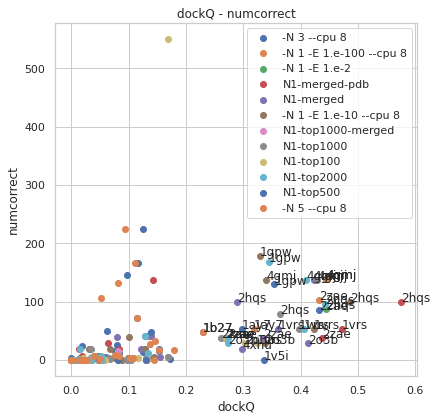

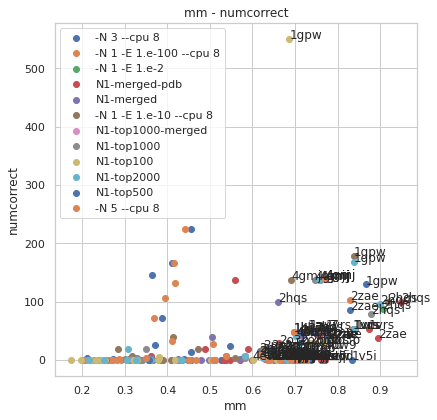

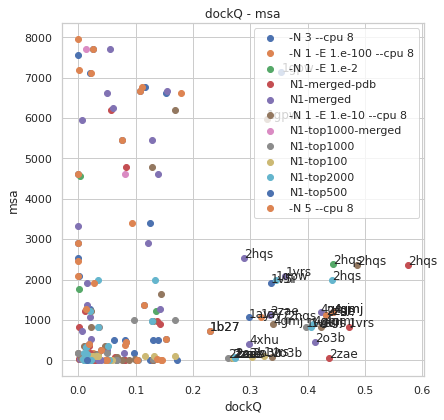

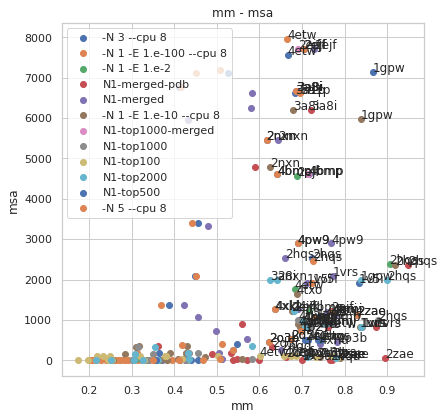

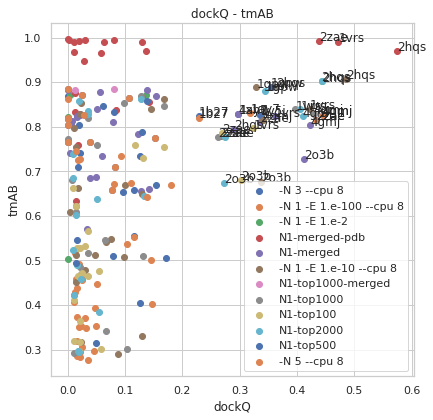

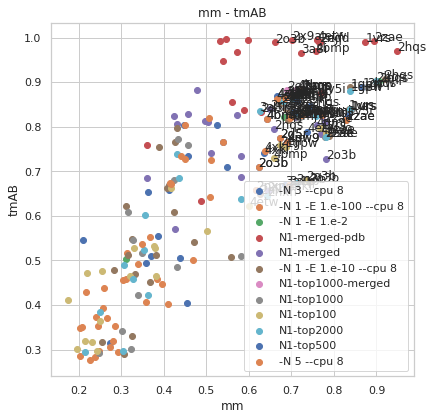

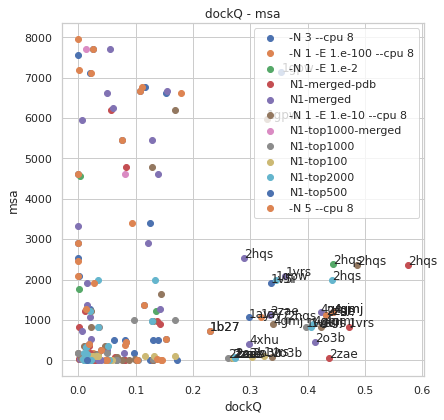

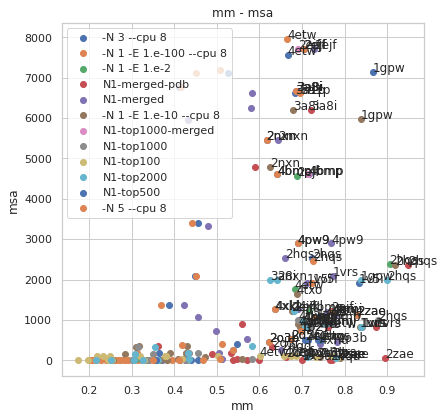

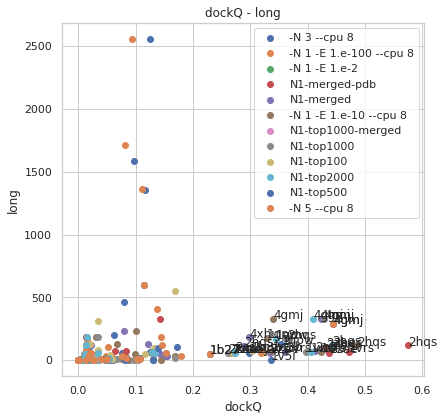

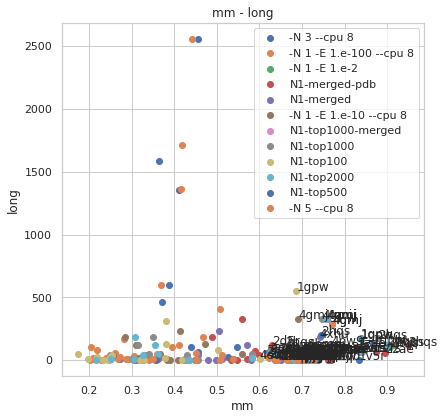

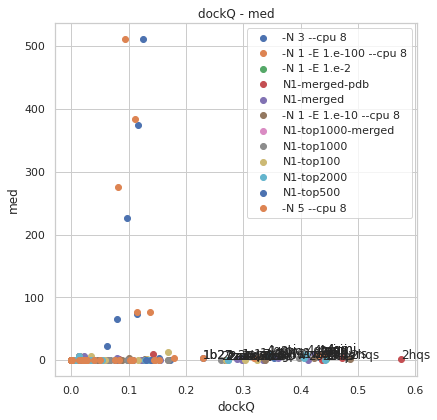

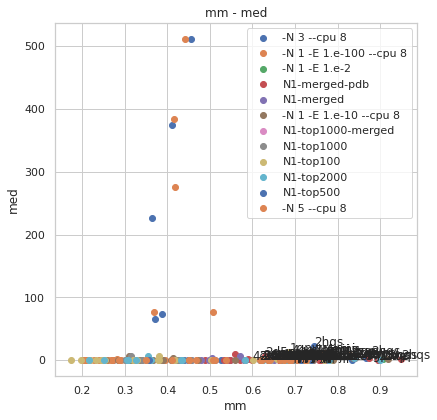

In [232]:
tempdf=df_max.loc[df_max.params.isin(JHsets)] 


tempdf=tempdf.loc[tempdf.CODE.isin(goodmodels)]
cf={"dockQ":0.2,"mm":0.6,"numcorrect":50}
for y in ["numcorrect","msa","tmAB","msa","long","med"]:
    for x in ["dockQ","mm","numcorrect"]:
        cutoff=cf[x]
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        for d in JHsets:
            xdata=tempdf.loc[tempdf.params==d][x]
            ydata=tempdf.loc[tempdf.params==d][y]
            plt.scatter(xdata,ydata,label=d)
            cc=np.corrcoef(xdata,ydata)
            for i, txt in enumerate(tempdf.loc[tempdf.params==d].name):
                sstr=txt[0:4]
                if (xdata[i]>cutoff):
                    ax.annotate(sstr, (xdata[i], ydata[i]))
        ax.set_title(x + " - " + y )
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.legend()
    plt.close()

In [233]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8', 'pdbconfold', 'pdbcontacts',
       'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK',
       'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',


In [234]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '1ay7', '1b27', '1gcq', '1v5i',
       '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '3pv6', '5cra',
       '4pw9', '4xhu', '4xkl', '2nqd', '2ejf', '4etw'], dtype=object)

In [235]:
tempdf=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))]
tempdf

name  lenA  lenB     msa     msaA  \
JHparams    code                                                               
PDB         1ay7  1ay7_u2_A-1ay7_u1_A.pdb-step1    97    97  1060.0   1485.0   
            1b27  1b27_u2_A-1b27_u1_A.pdb-step1   109   109   733.0   1484.0   
            1gpw  1gpw_u1_A-1gpw_u2_A.pdb-step1   252   204  7137.0  58466.0   
            1v5i  1v5i_u2_A-1v5i_u1_A.pdb-step1   276   276     0.0      0.0   
            1vrs  1vrs_u2_A-1vrs_u1_A.pdb-step1   124   124     0.0      0.0   
...                                         ...   ...   ...     ...      ...   
pdbcontacts 2o3b            2o3b_u1_A-2o3b_u2_A   240   144   456.0   5431.0   
            2x9a            2x9a_u1_A-2x9a_u2_A   103    63     4.0   2604.0   
            2zae            2zae_u1_A-2zae_u2_A   107    93  1125.0   1659.0   
            4gmj            4gmj_u1_A-4gmj_u2_A   253   236  1189.0   6152.0   
            4xhu            4xhu_u2_A-4xhu_u1_A   352   352   410.0   8381.0   

                     msaB   cdhit  dockQ   fnat     iRMS  ...  CODE  \
JHparams    code                                          ...         
PDB         1ay7   2034.0   986.0  0.892  0.861  185.585  ...  1ay7   
            1b27   2034.0   654.0  0.919  0.800  204.850  ...  1b27   
            1gpw  67629.0  5348.0  0.656  0.667  479.285  ...  1gpw   
            1v5i      0.0     0.0  0.357  0.340  479.679  ...  1v5i   
            1vrs      0.0     0.0  0.276  0.755  206.013  ...  1vrs   
...                   ...     ...    ...    ...      ...  ...   ...   
pdbcontacts 2o3b    518.0   306.0  0.529  0.722    2.773  ...  2o3b   
            2x9a     18.0     4.0  0.692  0.750    0.814  ...  2x9a   
            2zae   1521.0   839.0  0.539  0.565    1.397  ...  2zae   
            4gmj   1646.0   523.0  0.275  0.488    2.149  ...  4gmj   
            4xhu   8381.0   240.0  0.467  0.519   10.946  ...  4xhu   

                       params      tmAB    msaAB  tmAB_max  msaAB_max  \
JHparams    code                                                        
PDB         1ay7          PDB  0.998225   1759.5   0.99846     2034.0   
            1b27          PDB  0.998015   1759.0   0.99893     2034.0   
            1gpw          PDB  0.974965  63047.5   0.98386    67629.0   
            1v5i          PDB  0.791080      0.0   0.94285        0.0   
            1vrs          PDB  0.954805      0.0   0.99533        0.0   
...                       ...       ...      ...       ...        ...   
pdbcontacts 2o3b  pdbcontacts  0.836740   2974.5   0.93597     5431.0   
            2x9a  pdbcontacts  0.911500   1311.0   0.98016     2604.0   
            2zae  pdbcontacts  0.860355   1590.0   0.93809     1659.0   
            4gmj  pdbcontacts  0.720295   3899.0   0.72888     6152.0   
            4xhu  pdbcontacts  0.873565   4344.0   0.92326     8381.0   

                  tmAB_min  msaAB_min  numcorrect  len  
JHparams    code                                        
PDB         1ay7   0.99799     1485.0         0.0  187  
            1b27   0.99710     1484.0         0.0  199  
            1gpw   0.96709    58466.0         0.0  456  
            1v5i   0.63931        0.0         0.0  354  
            1vrs   0.91428        0.0         0.0  241  
...                    ...        ...         ...  ...  
pdbcontacts 2o3b   0.73751      518.0         0.0  384  
            2x9a   0.84284       18.0         0.0  166  
            2zae   0.78262     1521.0         0.0  200  
            4gmj   0.71171     1646.0         0.0  489  
            4xhu   0.85175      307.0         0.0  447  

[86 rows x 51 columns]

In [236]:
df_max.loc[df_max.params=="N3-multimerged"]["dockQ"]

JHparams        code
N3-multimerged  1ay7    0.294
                1b27    0.249
                1bdj    0.000
                1buh    0.000
                1bvn    0.009
                        ...  
                4zfr    0.000
                5brr    0.006
                5cec    0.000
                5cra    0.016
                5eg3    0.000
Name: dockQ, Length: 107, dtype: float64

-N 3 --cpu 8
N1-merged
N1-merged-pdb
N1-top1000
N3-merged
N3-multimerged


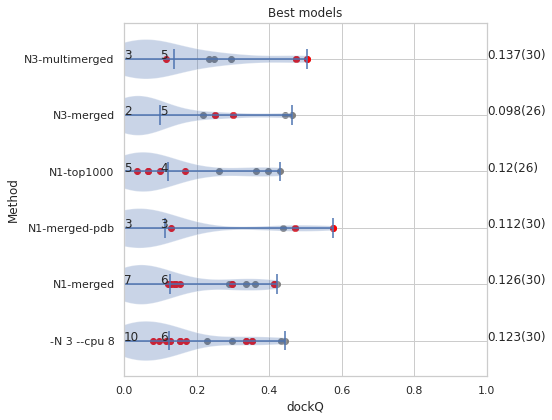

In [263]:
pdbset=['-N 3 --cpu 8',  'N1-top1000',
        'N1-merged','N1-merged-pdb','N3-merged',"N3-multimerged","N1-N3-multimerged"]
cutoff=0.2
codes=goodmodels
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
#tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]
tempdf=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))]
#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['CODE']).reset_index()
best_df.sort_values("params")

#good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
good_df=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))&(df_max.dockQ>cutoff )].reset_index()

plt.scatter(good_df.dockQ,good_df.params,color="grey")
plt.scatter(best_df.dockQ,best_df.params,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.params==best_df.params[i]])
    #print (numhit,newdf.params[i])
    if done[best_df.params[i]]==0:
        done[best_df.params[i]]=1
        ax.annotate(str(numhit),(.0, best_df.params[i]))
        ax.annotate(str(round(average[best_df.params[i]],3))+"("+str(length[good_df.params[i]])+")"
                    ,(1.0, best_df.params[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.params[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.params[i]])
    #print (numhit,newdf.params[i])
    if done[good_df.params[i]]==0:
        done[good_df.params[i]]=1
        ax.annotate(str(numhit),(.1, good_df.params[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


Text(0, 0.5, 'dockQ')

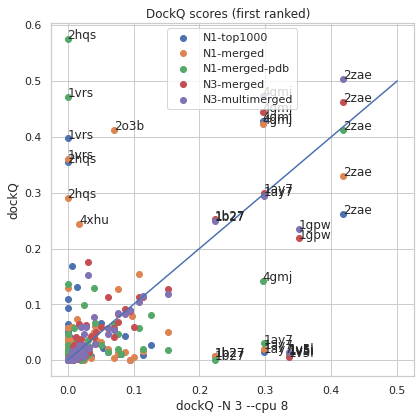

In [270]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in pdbset:
  
    if d=='-N 3 --cpu 8':continue   
    #print (d)
    df_merged = pd.merge(data_first['N3-multimerged'],data_first[d], on=['CODE'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.5]
y=[0,0.5]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ')

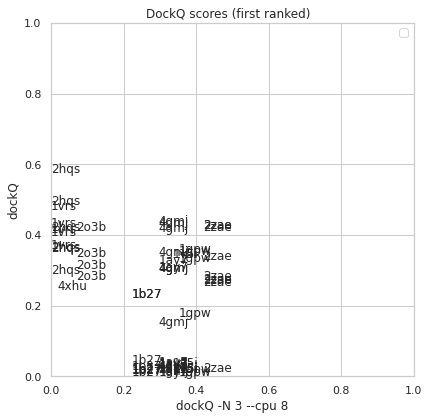

In [238]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in JHsets:
  
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
#x=[0,0.3]
#y=[0,0.3]
#plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [239]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '1ay7', '1b27', '1gcq', '1v5i',
       '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '3pv6', '5cra',
       '4pw9', '4xhu', '4xkl', '2nqd', '2ejf', '4etw'], dtype=object)

In [240]:
JHsets

['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ',
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

In [241]:
JHsets1=['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ']

In [242]:
JHsets2=[
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

In [243]:
JHsets=['-N 3 --cpu 8',
 '-N 1 -E 1.e-2 --cpu 8',
 '-N 1 -E 1.e-10 --cpu 8 ',
 '-N 5 --cpu 8']
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()


In [244]:
train_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets1))].reset_index()
test_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets2))].reset_index()

In [245]:
good_df=df_first.loc[(df_first.code.isin(goodmodels)&(df_first.JHparams.isin(JHsets)))].reset_index()

In [246]:
good_df=df_first.loc[(df_first.JHparams.isin(JHsets))].reset_index()

In [247]:
good_df

index                 name      JHparams lenA lenB   msa    msaA    msaB  \
0        0  1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060    1485    2034   
1        2  1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733    1484    2034   
2        4  1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8  129  118  5651  349880   23051   
3        6  1buh_u1_A-1buh_u2_A  -N 3 --cpu 8  291   72  1177  555226    1820   
4        8  1bvn_u1_A-1bvn_u2_A  -N 3 --cpu 8  496   75    95   52623     123   
..     ...                  ...           ...  ...  ...   ...     ...     ...   
648   6140  4zfr_u1_A-4zfr_u2_A  -N 5 --cpu 8  186   77  1358   14421   42037   
649   6142  5brr_u1_A-5brr_u2_A  -N 5 --cpu 8  378  266   611   13523   45636   
650   6144  5cec_u1_A-5cec_u2_A  -N 5 --cpu 8  403  191  1594   33067  312612   
651   6146  5cra_u1_A-5cra_u2_A  -N 5 --cpu 8  193   77     1      11   42026   
652   6148  5eg3_u1_A-5eg3_u2_A  -N 5 --cpu 8  303  105   499  560629   26558   

    cdhit  dockQ  ...  CODE        params      tmAB     msaAB tmAB_max  \
0    1026  0.298  ...  1ay7  -N 3 --cpu 8  0.828190    1759.5  0.84625   
1     654  0.223  ...  1b27  -N 3 --cpu 8  0.824750    1759.0  0.85428   
2    5071      0  ...  1bdj  -N 3 --cpu 8  0.861435  186465.5  0.92240   
3     548      0  ...  1buh  -N 3 --cpu 8  0.560760  278523.0  0.73259   
4      85  0.006  ...  1bvn  -N 3 --cpu 8  0.619740   26373.0  0.70905   
..    ...    ...  ...   ...           ...       ...       ...      ...   
648   490      0  ...  4zfr  -N 5 --cpu 8  0.796765   28229.0  0.83034   
649   550   0.02  ...  5brr  -N 5 --cpu 8  0.790865   29579.5  0.80934   
650  1577      0  ...  5cec  -N 5 --cpu 8  0.628690  172839.5  0.85640   
651     1  0.008  ...  5cra  -N 5 --cpu 8  0.536735   21018.5  0.71605   
652   278      0  ...  5eg3  -N 5 --cpu 8  0.733390  293593.5  0.77821   

    msaAB_max tmAB_min msaAB_min numcorrect  len  
0      2034.0  0.81013    1485.0     53.985  187  
1      2034.0  0.79522    1484.0     49.025  199  
2    349880.0  0.80047   23051.0          0  247  
3    555226.0  0.38893    1820.0          0  363  
4     52623.0  0.53043     123.0          0  571  
..        ...      ...       ...        ...  ...  
648   42037.0  0.76319   14421.0          0  263  
649   45636.0  0.77239   13523.0          2  644  
650  312612.0  0.40098   33067.0          0  594  
651   42026.0  0.35742      11.0          0  270  
652  560629.0  0.68857   26558.0          0  408  

[653 rows x 54 columns]

In [248]:
cutoff

0.2

Text(0.5, 1.0, 'CC 0.492 Good: 1.0 Loss: 0.028 , 0.014 Test: 10')

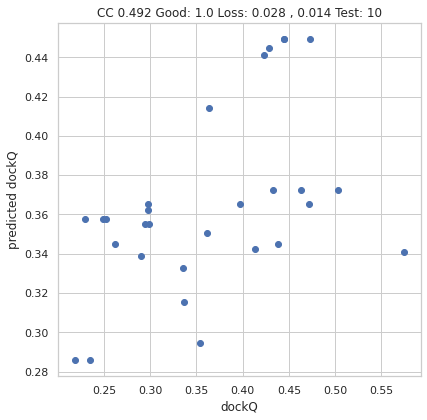

In [264]:
ydata=good_df.dockQ
cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]

#xdata=good_df[["lenA","lenB","long","med"]]
#cols=["longA","longB","medA","medB","tmA","tmB"]
cols=["med","long","msa"]
#cols=["msa"]
xdata=good_df[cols]


reg.fit(xdata,ydata)
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
(i,j,dockq,mm)=get_ranks(good_df,ypred)
#print(i,j,k/i)
ax.set_title("CC" + " " + str(round(cc[0,1],3))
            + " Good: " + str(round(j/i,3)) + " Loss: " + str(round(dockq/i,3))
             + " , " + str(round(mm/i,3))
             + " Test: " + str(i)
            )


In [250]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 0.017167313186421555
Coefficients: 
 [-9.54200191e-05  2.69138288e-05  3.69012345e-06]


In [251]:

for s in JHsets:
    set_df=good_df.loc[good_df.params==s]
    ypred=set_df["dockQ"].to_list()
    (i,j,dockq,mm)=get_ranks(set_df,ypred)
    print (s,i,j,dockq,mm)

-N 3 --cpu 8 6 6 0.0 0.0
-N 1 -E 1.e-2 --cpu 8 0 0 0 0


-N 1 -E 1.e-10 --cpu 8  6 6 0.0 0.0


-N 5 --cpu 8 4 4 0.0 0.0


AttributeError: 'float' object has no attribute 'shape'

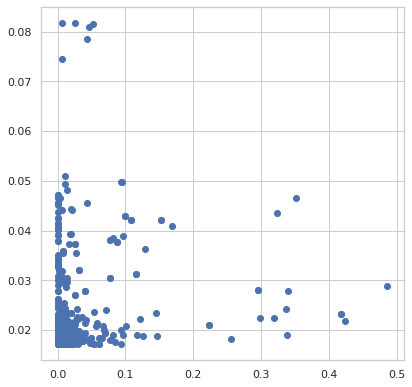

AttributeError: 'float' object has no attribute 'shape'

In [252]:
xdata=good_df[cols]
ydata=good_df.dockQ

ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")


In [253]:
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()
good_df

index                 name      JHparams lenA lenB   msa    msaA    msaB  \
0       0  1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060    1485    2034   
1       2  1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733    1484    2034   
2      30  1gcq_u1_A-1gcq_u2_A  -N 3 --cpu 8   66   57  1365   77497   77704   
3      34  1gpw_u1_A-1gpw_u2_A  -N 3 --cpu 8  252  204  7137   58466   67629   
4      86  1v5i_u1_A-1v5i_u2_A  -N 3 --cpu 8  276   78  1922   54177   12066   
..    ...                  ...           ...  ...  ...   ...     ...     ...   
85   6114  4txo_u1_A-4txo_u2_A  -N 5 --cpu 8  178  158  7106  131653  115265   
86   6124  4xhu_u1_A-4xhu_u2_A  -N 5 --cpu 8  352   95   410    9970     548   
87   6126  4xkl_u1_A-4xkl_u2_A  -N 5 --cpu 8   76   34  1262   41752  442180   
88   6130  4xs0_u1_A-4xs0_u2_A  -N 5 --cpu 8  147  141  3395    9453    9375   
89   6146  5cra_u1_A-5cra_u2_A  -N 5 --cpu 8  193   77     1      11   42026   

   cdhit  dockQ  ...  CODE        params      tmAB     msaAB tmAB_max  \
0   1026  0.298  ...  1ay7  -N 3 --cpu 8  0.828190    1759.5  0.84625   
1    654  0.223  ...  1b27  -N 3 --cpu 8  0.824750    1759.0  0.85428   
2    765  0.115  ...  1gcq  -N 3 --cpu 8  0.539990   77600.5  0.63426   
3   5348  0.351  ...  1gpw  -N 3 --cpu 8  0.885175   63047.5  0.89229   
4   1642  0.336  ...  1v5i  -N 3 --cpu 8  0.818890   33121.5  0.88557   
..   ...    ...  ...   ...           ...       ...       ...      ...   
85  6529  0.022  ...  4txo  -N 5 --cpu 8  0.725480  123459.0  0.74765   
86   240  0.018  ...  4xhu  -N 5 --cpu 8  0.678145    5259.0  0.73972   
87   355  0.014  ...  4xkl  -N 5 --cpu 8  0.740180  241966.0  0.88845   
88  2649  0.094  ...  4xs0  -N 5 --cpu 8  0.732555    9414.0  0.74440   
89     1  0.008  ...  5cra  -N 5 --cpu 8  0.536735   21018.5  0.71605   

   msaAB_max tmAB_min msaAB_min numcorrect  len  
0     2034.0  0.81013    1485.0     53.985  187  
1     2034.0  0.79522    1484.0     49.025  199  
2    77704.0  0.44572   77497.0      71.76  123  
3    67629.0  0.87806   58466.0        119  456  
4    54177.0  0.75221   12066.0          1  354  
..       ...      ...       ...        ...  ...  
85  131653.0  0.70331  115265.0          1  336  
86    9970.0  0.61657     548.0          0  447  
87  442180.0  0.59191   41752.0          0  110  
88    9453.0  0.72071    9375.0    224.928  288  
89   42026.0  0.35742      11.0          0  270  

[90 rows x 54 columns]

In [254]:
# Now we try all combinations - no plots
set1_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets1))].reset_index()
set2_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets2))].reset_index()
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()

cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]
ydata=good_df.dockQ

res={}
maxvalue=0
for c in cols:
    xdata=good_df[[c]]
    reg.fit(xdata,ydata)
    ypred = reg.predict(xdata)
    print (c,round(np.corrcoef(ydata,ypred)[0,1],3))
    res[c]=np.corrcoef(ydata,ypred)[0,1]
    maxvalue=max(res[c],maxvalue)    
for c in cols:
    for d in cols:
        xdata=good_df[[c,d]]
        reg.fit(xdata,ydata)
        ypred = reg.predict(xdata)
        #print (c,d,round(np.corrcoef(ydata,ypred)[0,1],3))
        res[c+d]=np.corrcoef(ydata,ypred)[0,1]
        #if (res[c+d]-maxvalue>0.0):
        #    print (c,d,round(np.corrcoef(ydata,ypred)[0,1],3))
        (i,j,k,l)=get_ranks(good_df,ypred)
        print (c,d,i,j,k,l)

AttributeError: 'float' object has no attribute 'shape'

In [255]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


Intercept: 
 0.12710879285076881
Coefficients: 
 [-0.00013252]


Text(0, 0.5, 'predicted dockQ')

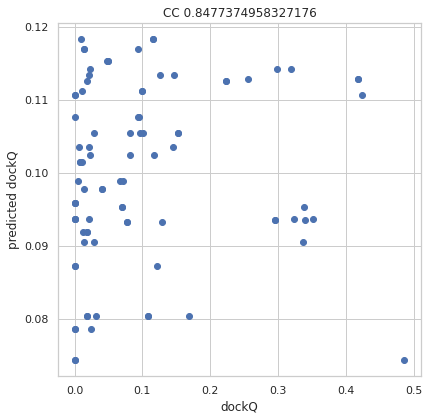

In [256]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
#cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")


In [257]:
newdf=df.loc[df.JHparams=="trRosetta"]
plt.scatter(newdf.csv,newdf.)

SyntaxError: invalid syntax (<ipython-input-257-1bbe5c8e123e>, line 2)

In [258]:
newdf[["CODE","dockQ","csv","tmAB","long"]].sort_values("csv")

KeyError: "['csv'] not in index"

In [259]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']


Text(0.5, 0, 'cdhit')

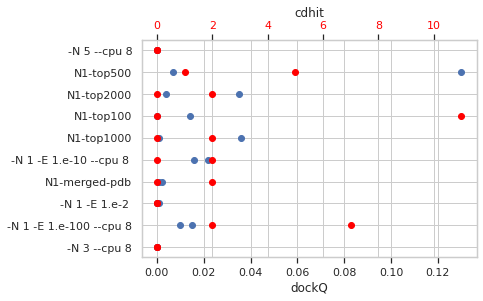

In [260]:
newdf=df.loc[(df.CODE=="4etw")&(df.JHparams.isin(JHsets))].reset_index()
fig, ax1 = plt.subplots()
ax1.set_xlabel('dockQ')
ax1.scatter(newdf.dockQ,newdf.JHparams)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.scatter(newdf.long,newdf.JHparams,color="red")
ax2.tick_params(axis='x', labelcolor="red")
ax2.set_xlabel('cdhit')

Text(0.5, 0, 'cdhit')

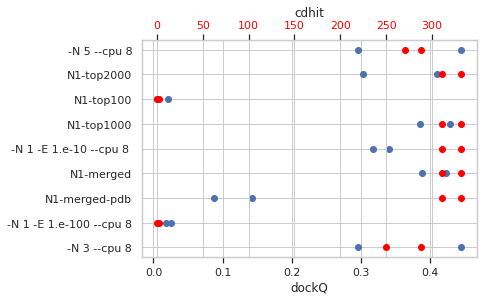

In [261]:
newdf=df.loc[(df.CODE=="4gmj")&(df.JHparams.isin(JHsets))].reset_index()
fig, ax1 = plt.subplots()
ax1.set_xlabel('dockQ')
ax1.scatter(newdf.dockQ,newdf.JHparams)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.scatter(newdf.long,newdf.JHparams,color="red")
ax2.tick_params(axis='x', labelcolor="red")
ax2.set_xlabel('cdhit')

# bes models to test 2zae 4gmj
# Bad model 4etw

In [262]:
df_max.loc[(df_max.params=="trRosetta") & (df_max.dockQ==0)]

name  lenA  lenB     msa      msaA      msaB  \
JHparams  code                                                                
trRosetta 3fap  3fap_u2_A-3fap_u1_A   108   108  1208.0   35975.0   35975.0   
          3l1z  3l1z_u2_A-3l1z_u1_A   153   153  1390.0  136672.0  136672.0   
          3rj3  3rj3_u2_A-3rj3_u1_A   295   295   359.0   55937.0   55937.0   
          4emj  4emj_u2_A-4emj_u1_A   403   403  6589.0  354953.0  354953.0   

                 cdhit  dockQ  fnat     iRMS  ...  CODE     params      tmAB  \
JHparams  code                                ...                              
trRosetta 3fap   573.0    0.0   0.0  187.525  ...  3fap  trRosetta  0.840125   
          3l1z   830.0    0.0   0.0  261.906  ...  3l1z  trRosetta  0.776680   
          3rj3   247.0    0.0   0.0  515.213  ...  3rj3  trRosetta  0.635370   
          4emj  5681.0    0.0   0.0  687.538  ...  4emj  trRosetta  0.884110   

                   msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams  code                                                       
trRosetta 3fap   18731.0   0.87845    35975.0   0.80207     1489.0   
          3l1z   87194.0   0.83424   136672.0   0.72778    37864.0   
          3rj3   39722.5   0.80210    55937.0   0.48427    23508.0   
          4emj  195361.5   0.90839   354953.0   0.86736    35929.0   

                numcorrect  len  
JHparams  code                   
trRosetta 3fap         0.0  201  
          3l1z         0.0  239  
          3rj3         0.0  421  
          4emj         0.0  509  

[4 rows x 51 columns]